In [1]:
# Install standard analytics libraries
import numpy as np
import pandas as pd
from pathlib import Path
import re
import xlsxwriter
from xlsxwriter.utility import xl_rowcol_to_cell
from datetime import datetime, timedelta
import os

print('Libraries imported.')

Libraries imported.


In [2]:
# Import graphics libraries
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [3]:
# Define path for folder with png docs
file_name = 'Airport_Compressor_4_Updated_Descriptions'

path1 = Path.home().joinpath('Documents', 'EnLink', file_name + '.xlsx')
out_path = Path.home().joinpath('Documents', 'EnLink')

# Create folder for analysis files
if not os.path.exists(out_path):
    os.makedirs(out_path)

# Define path for excel report
out_file = path1.stem +'_Analysis_v1.xlsx'
excel_out = Path.home().joinpath(out_path, out_file)
writer = pd.ExcelWriter(excel_out, engine='xlsxwriter')

# Create folder for analysis file
if not os.path.exists(out_path):
    os.makedirs(out_path)
    
print('File to read:', path1)

File to read: C:\Users\jmchale\Documents\EnLink\Airport_Compressor_4_Updated_Descriptions.xlsx


In [4]:
# Read file and create dataframe
df = pd.read_excel(path1)
print('Data read into a dataframe.')

Data read into a dataframe.


In [5]:
display(df.head())

Unnamed: 0             1 stage pressure           Unnamed: 2  \
0            Date-Time  GCS_MIDW_AIRPORT_CMP4_1STSP            Date-Time   
1  2019-10-31T09:07:27                          124  2019-10-31T09:47:27   
2  2019-10-31T09:59:28                          125  2019-10-31T09:53:27   
3  2019-10-31T10:01:27                          124  2019-10-31T09:59:28   
4  2019-10-31T10:09:27                          125  2019-10-31T10:01:27   

            2nd stage pressure           Unnamed: 4  \
0  GCS_MIDW_AIRPORT_CMP4_2NDSP            Date-Time   
1                          416  2019-10-31T09:49:27   
2                          418  2019-10-31T09:53:27   
3                          416  2019-10-31T09:55:27   
4                          418  2019-10-31T09:59:28   

            3rd stage pressure           Unnamed: 6  \
0  GCS_MIDW_AIRPORT_CMP4_3RDSP            Date-Time   
1                         1122  2019-10-31T09:51:28   
2                         1127  2019-10-31T09:53:27   
3                         1129  2019-10-31T09:55:27   
4                         1122  2019-10-31T09:57:27   

            compressor oil pressure           Unnamed: 8  \
0  GCS_MIDW_AIRPORT_CMP4_CMPOILPRES            Date-Time   
1                                55  2019-10-31T09:49:27   
2                                54  2019-10-31T09:55:27   
3                                55  2019-10-31T09:57:27   
4                                54  2019-10-31T09:59:28   

             compressor oil temp  ...          Unnamed: 20  \
0  GCS_MIDW_AIRPORT_CMP4_CMPOILT  ...            Date-Time   
1                            173  ...  2019-10-31T09:51:28   
2                            172  ...  2019-10-31T09:53:27   
3                            173  ...  2019-10-31T09:55:27   
4                            172  ...  2019-10-31T09:57:27   

               Cylinder 4 Temp          Unnamed: 22  \
0  GCS_MIDW_AIRPORT_CMP4_CYL4T            Date-Time   
1                          265  2019-10-31T09:47:27   
2                          266  2019-10-31T09:53:27   
3                          267  2019-10-31T09:55:27   
4                          265  2019-10-31T09:57:27   

              Engine Vibration 1          Unnamed: 24  \
0  GCS_MIDW_AIRPORT_CMP4_ENGVIB1            Date-Time   
1                             95  2019-10-31T09:51:28   
2                             94  2019-10-31T09:53:27   
3                             95  2019-10-31T09:55:27   
4                             93  2019-10-31T09:57:27   

              Compressor RPMs          Unnamed: 26  \
0  GCS_MIDW_AIRPORT_CMP4_RPMS            Date-Time   
1                        1376  2019-11-01T10:57:28   
2                        1375  2019-11-01T11:45:26   
3                        1382  2019-11-01T17:17:27   
4                        1375  2019-11-01T18:31:26   

           Compressor Run Status          Unnamed: 28  \
0  GCS_MIDW_AIRPORT_CMP4_RSTATUS            Date-Time   
1                              0  2019-10-31T09:51:28   
2                              1  2019-10-31T09:53:27   
3                              0  2019-10-31T09:55:27   
4                              1  2019-10-31T09:57:27   

       Comprssor Suction Pressure  
0  GCS_MIDW_AIRPORT_CMP4_SUCPRESS  
1                             255  
2                             257  
3                             255  
4                             257  

[5 rows x 30 columns]

In [6]:
# print the dimensions of the dataframe
print(df.shape)
print(df.columns)

(192842, 30)
Index(['Unnamed: 0', '1 stage pressure', 'Unnamed: 2', '2nd stage pressure',
       'Unnamed: 4', '3rd stage pressure', 'Unnamed: 6',
       'compressor oil pressure', 'Unnamed: 8', 'compressor oil temp',
       'Unnamed: 10', 'Vibration 1', 'Unnamed: 12', 'Cooler Vibration',
       'Unnamed: 14', 'Cylinder 1 Temp', 'Unnamed: 16', 'Cylinder 2 Temp',
       'Unnamed: 18', 'Cylinder 3 Temp', 'Unnamed: 20', 'Cylinder 4 Temp',
       'Unnamed: 22', 'Engine Vibration 1', 'Unnamed: 24', 'Compressor RPMs',
       'Unnamed: 26', 'Compressor Run Status', 'Unnamed: 28',
       'Comprssor Suction Pressure'],
      dtype='object')


In [7]:
df.rename(columns={'Unnamed: 0':'Stage_P_1_DateTime',
                   '1 stage pressure':'Stage_P_1',
                   'Unnamed: 2':'Stage_P_2_DateTime',
                   '2nd stage pressure':'Stage_P_2',
                   'Unnamed: 4':'Stage_P_3_DateTime',
                   '3rd stage pressure':'Stage_P_3',
                   'Unnamed: 6':'Comp_Oil_P_DateTime',
                   'compressor oil pressure':'Comp_Oil_P',
                   'Unnamed: 8':'Comp_Oil_T_DateTime',
                   'compressor oil temp':'Comp_Oil_T',
                   'Unnamed: 10':'Vibration_1_DateTime',
                   'Vibration 1':'Vibration_1',
                   'Unnamed: 12':'Cooler_Vibration_DateTime',
                   'Cooler Vibration':'Cooler_Vibration',
                   'Unnamed: 14':'Cylinder_T_1_DateTime',
                   'Cylinder 1 Temp':'Cylinder_T_1',
                   'Unnamed: 16':'Cylinder_T_2_DateTime',
                   'Cylinder 2 Temp':'Cylinder_T_2',
                   'Unnamed: 18':'Cylinder_T_3_DateTime',
                   'Cylinder 3 Temp':'Cylinder_T_3',
                   'Unnamed: 20':'Cylinder_T_4_DateTime',
                   'Cylinder 4 Temp':'Cylinder_T_4',
                   'Unnamed: 22':'Engine_Vibration_1_DateTime',
                   'Engine Vibration 1':'Engine_Vibration_1',
                   'Unnamed: 24':'Compressor_RPMs_DateTime',
                   'Compressor RPMs':'Compressor_RPMs',
                   'Unnamed: 26':'Compressor_Run_Status_DateTime',
                   'Compressor Run Status':'Compressor_Run_Status',
                   'Unnamed: 28':'Compressor_Suction_P_DateTime',
                   'Comprssor Suction Pressure':'Compressor_Suction_P'}, inplace=True)
df.columns

Index(['Stage_P_1_DateTime', 'Stage_P_1', 'Stage_P_2_DateTime', 'Stage_P_2',
       'Stage_P_3_DateTime', 'Stage_P_3', 'Comp_Oil_P_DateTime', 'Comp_Oil_P',
       'Comp_Oil_T_DateTime', 'Comp_Oil_T', 'Vibration_1_DateTime',
       'Vibration_1', 'Cooler_Vibration_DateTime', 'Cooler_Vibration',
       'Cylinder_T_1_DateTime', 'Cylinder_T_1', 'Cylinder_T_2_DateTime',
       'Cylinder_T_2', 'Cylinder_T_3_DateTime', 'Cylinder_T_3',
       'Cylinder_T_4_DateTime', 'Cylinder_T_4', 'Engine_Vibration_1_DateTime',
       'Engine_Vibration_1', 'Compressor_RPMs_DateTime', 'Compressor_RPMs',
       'Compressor_Run_Status_DateTime', 'Compressor_Run_Status',
       'Compressor_Suction_P_DateTime', 'Compressor_Suction_P'],
      dtype='object')

In [8]:
# BOXPLOTS

In [9]:
# Create dataframe without datetimes
df1 = df[['Stage_P_1', 'Stage_P_2', 'Stage_P_3', 'Comp_Oil_P', 'Comp_Oil_T',
          'Vibration_1', 'Cooler_Vibration', 'Cylinder_T_1', 'Cylinder_T_2',
          'Cylinder_T_3', 'Cylinder_T_4', 'Engine_Vibration_1',
          'Compressor_RPMs', 'Compressor_Run_Status', 'Compressor_Suction_P']]
display(df1.head())

Stage_P_1                    Stage_P_2  \
0  GCS_MIDW_AIRPORT_CMP4_1STSP  GCS_MIDW_AIRPORT_CMP4_2NDSP   
1                          124                          416   
2                          125                          418   
3                          124                          416   
4                          125                          418   

                     Stage_P_3                        Comp_Oil_P  \
0  GCS_MIDW_AIRPORT_CMP4_3RDSP  GCS_MIDW_AIRPORT_CMP4_CMPOILPRES   
1                         1122                                55   
2                         1127                                54   
3                         1129                                55   
4                         1122                                54   

                      Comp_Oil_T                    Vibration_1  \
0  GCS_MIDW_AIRPORT_CMP4_CMPOILT  GCS_MIDW_AIRPORT_CMP4_CMPVIB1   
1                            173                           0.77   
2                            172                           0.75   
3                            173                           0.74   
4                            172                           0.78   

                  Cooler_Vibration                 Cylinder_T_1  \
0  GCS_MIDW_AIRPORT_CMP4_COOLERVIB  GCS_MIDW_AIRPORT_CMP4_CYL1T   
1                              2.2                          241   
2                              2.5                          240   
3                              2.2                          241   
4                              2.1                          242   

                  Cylinder_T_2                 Cylinder_T_3  \
0  GCS_MIDW_AIRPORT_CMP4_CYL2T  GCS_MIDW_AIRPORT_CMP4_CYL3T   
1                          265                          234   
2                          264                          235   
3                          266                          236   
4                          265                          237   

                  Cylinder_T_4             Engine_Vibration_1  \
0  GCS_MIDW_AIRPORT_CMP4_CYL4T  GCS_MIDW_AIRPORT_CMP4_ENGVIB1   
1                          265                             95   
2                          266                             94   
3                          267                             95   
4                          265                             93   

              Compressor_RPMs          Compressor_Run_Status  \
0  GCS_MIDW_AIRPORT_CMP4_RPMS  GCS_MIDW_AIRPORT_CMP4_RSTATUS   
1                        1376                              0   
2                        1375                              1   
3                        1382                              0   
4                        1375                              1   

             Compressor_Suction_P  
0  GCS_MIDW_AIRPORT_CMP4_SUCPRESS  
1                             255  
2                             257  
3                             255  
4                             257

In [10]:
df1.dtypes

Stage_P_1                object
Stage_P_2                object
Stage_P_3                object
Comp_Oil_P               object
Comp_Oil_T               object
Vibration_1              object
Cooler_Vibration         object
Cylinder_T_1             object
Cylinder_T_2             object
Cylinder_T_3             object
Cylinder_T_4             object
Engine_Vibration_1       object
Compressor_RPMs          object
Compressor_Run_Status    object
Compressor_Suction_P     object
dtype: object

In [11]:
df1.columns

Index(['Stage_P_1', 'Stage_P_2', 'Stage_P_3', 'Comp_Oil_P', 'Comp_Oil_T',
       'Vibration_1', 'Cooler_Vibration', 'Cylinder_T_1', 'Cylinder_T_2',
       'Cylinder_T_3', 'Cylinder_T_4', 'Engine_Vibration_1', 'Compressor_RPMs',
       'Compressor_Run_Status', 'Compressor_Suction_P'],
      dtype='object')

In [12]:
# Convert to numeric
cols1 = df1.columns
df1[cols1] = df1[cols1].apply(pd.to_numeric, errors='coerce')
df1.dtypes

C:\Users\jmchale\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Stage_P_1                float64
Stage_P_2                float64
Stage_P_3                float64
Comp_Oil_P               float64
Comp_Oil_T               float64
Vibration_1              float64
Cooler_Vibration         float64
Cylinder_T_1             float64
Cylinder_T_2             float64
Cylinder_T_3             float64
Cylinder_T_4             float64
Engine_Vibration_1       float64
Compressor_RPMs          float64
Compressor_Run_Status    float64
Compressor_Suction_P     float64
dtype: object

In [13]:
# Normalize data
df1['Stage_P_1'] = df1.Stage_P_1/df1.Stage_P_1.mean()
df1['Stage_P_2'] = df1.Stage_P_2/df1.Stage_P_2.mean()
df1['Stage_P_3'] = df1.Stage_P_3/df1.Stage_P_3.mean()
df1['Comp_Oil_P'] = df1.Comp_Oil_P/df1.Comp_Oil_P.mean()
df1['Comp_Oil_T'] = df1.Comp_Oil_T/df1.Comp_Oil_T.mean()
df1['Vibration_1'] = df1.Vibration_1/df1.Vibration_1.mean()
df1['Cooler_Vibration'] = df1.Cooler_Vibration/df1.Cooler_Vibration.mean()
df1['Cylinder_T_1'] = df1.Cylinder_T_1/df1.Cylinder_T_1.mean()
df1['Cylinder_T_2'] = df1.Cylinder_T_2/df1.Cylinder_T_2.mean()
df1['Cylinder_T_3'] = df1.Cylinder_T_3/df1.Cylinder_T_3.mean()
df1['Cylinder_T_4'] = df1.Cylinder_T_4/df1.Cylinder_T_4.mean()
df1['Engine_Vibration_1'] = df1.Engine_Vibration_1/df1.Engine_Vibration_1.mean()
df1['Compressor_RPMs'] = df1.Compressor_RPMs/df1.Compressor_RPMs.mean()
df1['Compressor_Suction_P'] = df1.Compressor_Suction_P/df1.Compressor_Suction_P.mean()

display(df1.head())

<ipython-input-13-9ccb2f9dd286>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Stage_P_1'] = df1.Stage_P_1/df1.Stage_P_1.mean()
<ipython-input-13-9ccb2f9dd286>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Stage_P_2'] = df1.Stage_P_2/df1.Stage_P_2.mean()
<ipython-input-13-9ccb2f9dd286>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

Stage_P_1  Stage_P_2  Stage_P_3  Comp_Oil_P  Comp_Oil_T  Vibration_1  \
0        NaN        NaN        NaN         NaN         NaN          NaN   
1   0.995917   1.044921   1.038624    0.947721    0.998341     1.100869   
2   1.003948   1.049945   1.043253    0.930490    0.992570     1.072275   
3   0.995917   1.044921   1.045104    0.947721    0.998341     1.057978   
4   1.003948   1.049945   1.038624    0.930490    0.992570     1.115166   

   Cooler_Vibration  Cylinder_T_1  Cylinder_T_2  Cylinder_T_3  Cylinder_T_4  \
0               NaN           NaN           NaN           NaN           NaN   
1          1.101538      0.925900      1.038070      0.918828      0.995284   
2          1.251748      0.922058      1.034152      0.922754      0.999040   
3          1.101538      0.925900      1.041987      0.926681      1.002796   
4          1.051468      0.929742      1.038070      0.930608      0.995284   

   Engine_Vibration_1  Compressor_RPMs  Compressor_Run_Status  \
0                 NaN              NaN                    NaN   
1            1.067647         1.039596                    0.0   
2            1.056409         1.038840                    1.0   
3            1.067647         1.044129                    0.0   
4            1.045170         1.038840                    1.0   

   Compressor_Suction_P  
0                   NaN  
1              1.046622  
2              1.054831  
3              1.046622  
4              1.054831

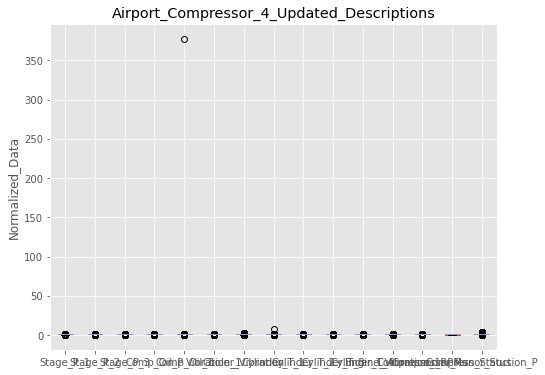

In [14]:
# Create boxplot of compressor data
df1.plot(kind='box', figsize=(8, 6))

plt.title(file_name)
plt.ylabel('Normalized_Data')

plt.show()

In [15]:
# Eliminate stray datapoints
df1 =df1.loc[df1['Comp_Oil_T'] < 5]
df1 =df1.loc[df1['Cylinder_T_1'] < 5]
df1.describe()

Stage_P_1     Stage_P_2     Stage_P_3    Comp_Oil_P    Comp_Oil_T  \
count  78998.000000  95563.000000  95512.000000  95517.000000  96661.000000   
mean       0.999942      0.986371      0.992153      1.010671      0.996178   
std        0.134683      0.094606      0.104811      0.081664      0.052711   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.947727      0.969566      0.987711      0.947721      0.986799   
50%        0.971822      0.992173      1.006225      1.033878      1.004112   
75%        1.092296      1.019803      1.023813      1.068340      1.021424   
max        1.477812      1.456861      1.109903      1.464660      1.096444   

        Vibration_1  Cooler_Vibration  Cylinder_T_1  Cylinder_T_2  \
count  95610.000000      95566.000000  96661.000000  95465.000000   
mean       1.004881          0.967972      0.993160      1.001091   
std        0.133836          0.182149      0.093086      0.093150   
min        0.000000          0.000000      0.000000      0.000000   
25%        0.943602          0.851189      0.945109      0.963642   
50%        1.029384          0.951329      0.979687      1.010649   
75%        1.086572          1.051468      1.052683      1.053738   
max        1.329622          2.503496      1.225569      1.190842   

       Cylinder_T_3  Cylinder_T_4  Engine_Vibration_1  Compressor_RPMs  \
count  95563.000000  95516.000000        95631.000000     95706.000000   
mean       0.971806      0.999263            1.030731         0.994543   
std        0.074724      0.085153            0.140438         0.044498   
min        0.000000      0.000000            0.000000         0.000000   
25%        0.938461      0.961482            0.988978         0.994264   
50%        0.965947      0.995284            1.056409         0.999553   
75%        1.013067      1.047865            1.112600         1.013152   
max        1.158351      1.194341            1.460991         1.106081   

       Compressor_Run_Status  Compressor_Suction_P  
count             359.000000          75988.000000  
mean                0.584958              1.000481  
std                 0.493417              0.346695  
min                 0.000000              0.000000  
25%                 0.000000              0.944012  
50%                 1.000000              1.001474  
75%                 1.000000              1.034309  
max                 1.000000              4.104401

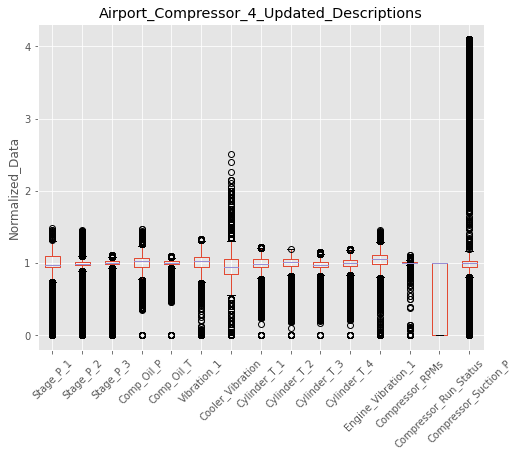

In [16]:
# Create boxplot of compressor data
df1.plot(kind='box', figsize=(8, 6))

plt.title(file_name)
plt.ylabel('Normalized_Data')
plt.xticks(rotation=45)

plt.show()

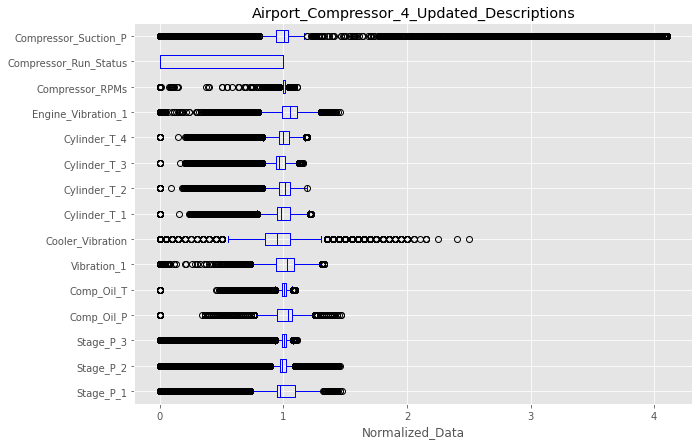

In [17]:
# horizontal box plots
df1.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title(file_name)
plt.xlabel('Normalized_Data')

plt.show()

In [18]:
# SUBPLOTS

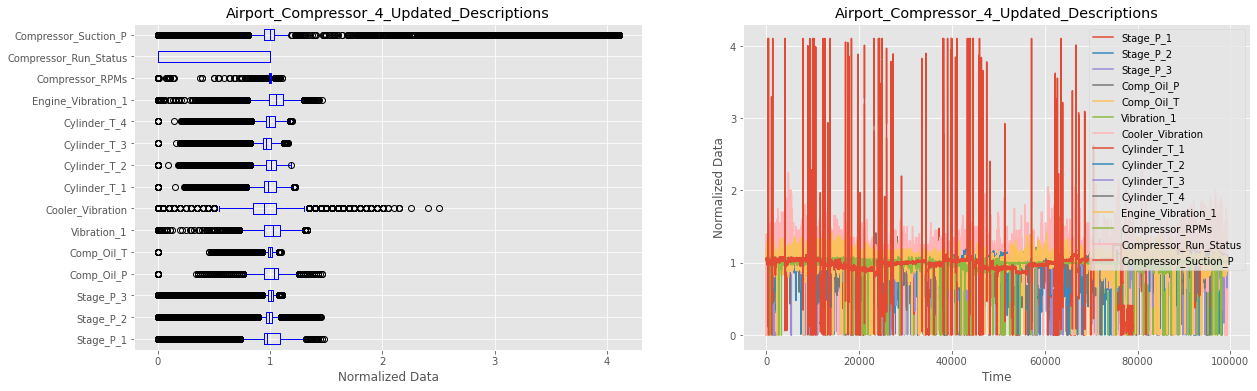

In [19]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df1.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title(file_name)
ax0.set_xlabel('Normalized Data')
#ax0.set_ylabel('Time')

# Subplot 2: Line plot
df1.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title (file_name)
ax1.set_ylabel('Normalized Data')
ax1.set_xlabel('Time')

plt.show()

In [20]:
# SCATTER PLOTS

In [21]:
df1.columns

Index(['Stage_P_1', 'Stage_P_2', 'Stage_P_3', 'Comp_Oil_P', 'Comp_Oil_T',
       'Vibration_1', 'Cooler_Vibration', 'Cylinder_T_1', 'Cylinder_T_2',
       'Cylinder_T_3', 'Cylinder_T_4', 'Engine_Vibration_1', 'Compressor_RPMs',
       'Compressor_Run_Status', 'Compressor_Suction_P'],
      dtype='object')

In [22]:
df2=df[['Stage_P_1_DateTime', 'Stage_P_1', 'Stage_P_2_DateTime', 'Stage_P_2',
       'Stage_P_3_DateTime', 'Stage_P_3', 'Comp_Oil_P_DateTime', 'Comp_Oil_P',
       'Comp_Oil_T_DateTime', 'Comp_Oil_T', 'Vibration_1_DateTime',
       'Vibration_1', 'Cooler_Vibration_DateTime', 'Cooler_Vibration',
       'Cylinder_T_1_DateTime', 'Cylinder_T_1', 'Cylinder_T_2_DateTime',
       'Cylinder_T_2', 'Cylinder_T_3_DateTime', 'Cylinder_T_3',
       'Cylinder_T_4_DateTime', 'Cylinder_T_4', 'Engine_Vibration_1_DateTime',
       'Engine_Vibration_1', 'Compressor_RPMs_DateTime', 'Compressor_RPMs',
       'Compressor_Run_Status_DateTime', 'Compressor_Run_Status',
       'Compressor_Suction_P_DateTime', 'Compressor_Suction_P']]
df2.describe()

Stage_P_1_DateTime  Stage_P_1   Stage_P_2_DateTime  Stage_P_2  \
count                 82278      81111               141873     140117   
unique                82277        182               141866        547   
top     2019-11-03T01:47:27        119  2019-11-03T01:27:27        389   
freq                      2       5956                    2       5724   

         Stage_P_3_DateTime  Stage_P_3  Comp_Oil_P_DateTime  Comp_Oil_P  \
count                140154     138350               126769      125234   
unique               140152        807               126769          70   
top     2019-11-03T01:11:27       1095  2020-01-20T13:21:29          61   
freq                      2       2329                    1       18490   

        Comp_Oil_T_DateTime  Comp_Oil_T  ... Cylinder_T_4_DateTime  \
count                 99359       97992  ...                131319   
unique                99354         113  ...                131311   
top     2019-11-03T01:47:27         174  ...   2019-11-03T01:03:27   
freq                      2        8695  ...                     2   

        Cylinder_T_4 Engine_Vibration_1_DateTime  Engine_Vibration_1  \
count         129657                      162325              160529   
unique           266                      162321                 130   
top              256         2019-11-03T01:11:27                  91   
freq            4355                           2                7473   

       Compressor_RPMs_DateTime  Compressor_RPMs  \
count                    192842           190806   
unique                   192831              402   
top         2019-11-03T01:11:27             1349   
freq                          2             6956   

       Compressor_Run_Status_DateTime  Compressor_Run_Status  \
count                             396                    369   
unique                            396                      3   
top               2020-04-14T11:30:17                      1   
freq                                1                    217   

       Compressor_Suction_P_DateTime  Compressor_Suction_P  
count                          79027                 78005  
unique                         79027                   760  
top              2020-01-29T16:33:55                   254  
freq                               1                  3845  

[4 rows x 30 columns]

In [23]:
display(df2)

Stage_P_1_DateTime                    Stage_P_1   Stage_P_2_DateTime  \
0                 Date-Time  GCS_MIDW_AIRPORT_CMP4_1STSP            Date-Time   
1       2019-10-31T09:07:27                          124  2019-10-31T09:47:27   
2       2019-10-31T09:59:28                          125  2019-10-31T09:53:27   
3       2019-10-31T10:01:27                          124  2019-10-31T09:59:28   
4       2019-10-31T10:09:27                          125  2019-10-31T10:01:27   
...                     ...                          ...                  ...   
192837                  NaN                          NaN                  NaN   
192838                  NaN                          NaN                  NaN   
192839                  NaN                          NaN                  NaN   
192840                  NaN                          NaN                  NaN   
192841                  NaN                          NaN                  NaN   

                          Stage_P_2   Stage_P_3_DateTime  \
0       GCS_MIDW_AIRPORT_CMP4_2NDSP            Date-Time   
1                               416  2019-10-31T09:49:27   
2                               418  2019-10-31T09:53:27   
3                               416  2019-10-31T09:55:27   
4                               418  2019-10-31T09:59:28   
...                             ...                  ...   
192837                          NaN                  NaN   
192838                          NaN                  NaN   
192839                          NaN                  NaN   
192840                          NaN                  NaN   
192841                          NaN                  NaN   

                          Stage_P_3  Comp_Oil_P_DateTime  \
0       GCS_MIDW_AIRPORT_CMP4_3RDSP            Date-Time   
1                              1122  2019-10-31T09:51:28   
2                              1127  2019-10-31T09:53:27   
3                              1129  2019-10-31T09:55:27   
4                              1122  2019-10-31T09:57:27   
...                             ...                  ...   
192837                          NaN                  NaN   
192838                          NaN                  NaN   
192839                          NaN                  NaN   
192840                          NaN                  NaN   
192841                          NaN                  NaN   

                              Comp_Oil_P  Comp_Oil_T_DateTime  \
0       GCS_MIDW_AIRPORT_CMP4_CMPOILPRES            Date-Time   
1                                     55  2019-10-31T09:49:27   
2                                     54  2019-10-31T09:55:27   
3                                     55  2019-10-31T09:57:27   
4                                     54  2019-10-31T09:59:28   
...                                  ...                  ...   
192837                               NaN                  NaN   
192838                               NaN                  NaN   
192839                               NaN                  NaN   
192840                               NaN                  NaN   
192841                               NaN                  NaN   

                           Comp_Oil_T  ... Cylinder_T_4_DateTime  \
0       GCS_MIDW_AIRPORT_CMP4_CMPOILT  ...             Date-Time   
1                                 173  ...   2019-10-31T09:51:28   
2                                 172  ...   2019-10-31T09:53:27   
3                                 173  ...   2019-10-31T09:55:27   
4                                 172  ...   2019-10-31T09:57:27   
...                               ...  ...                   ...   
192837                            NaN  ...                   NaN   
192838                            NaN  ...                   NaN   
192839                            NaN  ...                   NaN   
192840                            NaN  ...                   NaN   
192841                            NaN  ...                   NaN 

In [24]:
df2.dtypes

Stage_P_1_DateTime                object
Stage_P_1                         object
Stage_P_2_DateTime                object
Stage_P_2                         object
Stage_P_3_DateTime                object
Stage_P_3                         object
Comp_Oil_P_DateTime               object
Comp_Oil_P                        object
Comp_Oil_T_DateTime               object
Comp_Oil_T                        object
Vibration_1_DateTime              object
Vibration_1                       object
Cooler_Vibration_DateTime         object
Cooler_Vibration                  object
Cylinder_T_1_DateTime             object
Cylinder_T_1                      object
Cylinder_T_2_DateTime             object
Cylinder_T_2                      object
Cylinder_T_3_DateTime             object
Cylinder_T_3                      object
Cylinder_T_4_DateTime             object
Cylinder_T_4                      object
Engine_Vibration_1_DateTime       object
Engine_Vibration_1                object
Compressor_RPMs_

In [25]:
# Create list of date columns
df2_cols = df2.columns
datecols=[]
n=0
while n < df2.shape[1]:
    datecols.append(df2_cols[n])
    n=n+2
datecols

['Stage_P_1_DateTime',
 'Stage_P_2_DateTime',
 'Stage_P_3_DateTime',
 'Comp_Oil_P_DateTime',
 'Comp_Oil_T_DateTime',
 'Vibration_1_DateTime',
 'Cooler_Vibration_DateTime',
 'Cylinder_T_1_DateTime',
 'Cylinder_T_2_DateTime',
 'Cylinder_T_3_DateTime',
 'Cylinder_T_4_DateTime',
 'Engine_Vibration_1_DateTime',
 'Compressor_RPMs_DateTime',
 'Compressor_Run_Status_DateTime',
 'Compressor_Suction_P_DateTime']

In [26]:
# Convert to datetimes
df2[datecols] = df2[datecols].apply(pd.to_datetime, errors='coerce')
df2.dtypes

Stage_P_1_DateTime                datetime64[ns]
Stage_P_1                                 object
Stage_P_2_DateTime                datetime64[ns]
Stage_P_2                                 object
Stage_P_3_DateTime                datetime64[ns]
Stage_P_3                                 object
Comp_Oil_P_DateTime               datetime64[ns]
Comp_Oil_P                                object
Comp_Oil_T_DateTime               datetime64[ns]
Comp_Oil_T                                object
Vibration_1_DateTime              datetime64[ns]
Vibration_1                               object
Cooler_Vibration_DateTime         datetime64[ns]
Cooler_Vibration                          object
Cylinder_T_1_DateTime             datetime64[ns]
Cylinder_T_1                              object
Cylinder_T_2_DateTime             datetime64[ns]
Cylinder_T_2                              object
Cylinder_T_3_DateTime             datetime64[ns]
Cylinder_T_3                              object
Cylinder_T_4_DateTim

In [27]:
# Create list of data columns
df2_cols = df2.columns
datacols=[]
n=1
while n < df2.shape[1]:
    datacols.append(df2_cols[n])
    n=n+2
datacols

['Stage_P_1',
 'Stage_P_2',
 'Stage_P_3',
 'Comp_Oil_P',
 'Comp_Oil_T',
 'Vibration_1',
 'Cooler_Vibration',
 'Cylinder_T_1',
 'Cylinder_T_2',
 'Cylinder_T_3',
 'Cylinder_T_4',
 'Engine_Vibration_1',
 'Compressor_RPMs',
 'Compressor_Run_Status',
 'Compressor_Suction_P']

In [28]:
# Convert data columns to numeic
df2[datacols] = df2[datacols].apply(pd.to_numeric, errors='coerce')
df2.dtypes

Stage_P_1_DateTime                datetime64[ns]
Stage_P_1                                float64
Stage_P_2_DateTime                datetime64[ns]
Stage_P_2                                float64
Stage_P_3_DateTime                datetime64[ns]
Stage_P_3                                float64
Comp_Oil_P_DateTime               datetime64[ns]
Comp_Oil_P                               float64
Comp_Oil_T_DateTime               datetime64[ns]
Comp_Oil_T                               float64
Vibration_1_DateTime              datetime64[ns]
Vibration_1                              float64
Cooler_Vibration_DateTime         datetime64[ns]
Cooler_Vibration                         float64
Cylinder_T_1_DateTime             datetime64[ns]
Cylinder_T_1                             float64
Cylinder_T_2_DateTime             datetime64[ns]
Cylinder_T_2                             float64
Cylinder_T_3_DateTime             datetime64[ns]
Cylinder_T_3                             float64
Cylinder_T_4_DateTim

In [29]:
# Normalize data
df2['Stage_P_1'] = df2.Stage_P_1/df2.Stage_P_1.mean()
df2['Stage_P_2'] = df2.Stage_P_2/df2.Stage_P_2.mean()
df2['Stage_P_3'] = df2.Stage_P_3/df2.Stage_P_3.mean()
df2['Comp_Oil_P'] = df2.Comp_Oil_P/df2.Comp_Oil_P.mean()
df2['Comp_Oil_T'] = df2.Comp_Oil_T/df2.Comp_Oil_T.mean()
df2['Vibration_1'] = df2.Vibration_1/df2.Vibration_1.mean()
df2['Cooler_Vibration'] = df2.Cooler_Vibration/df2.Cooler_Vibration.mean()
df2['Cylinder_T_1'] = df2.Cylinder_T_1/df2.Cylinder_T_1.mean()
df2['Cylinder_T_2'] = df2.Cylinder_T_2/df2.Cylinder_T_2.mean()
df2['Cylinder_T_3'] = df2.Cylinder_T_3/df2.Cylinder_T_3.mean()
df2['Cylinder_T_4'] = df2.Cylinder_T_4/df2.Cylinder_T_4.mean()
df2['Engine_Vibration_1'] = df2.Engine_Vibration_1/df2.Engine_Vibration_1.mean()
df2['Compressor_RPMs'] = df2.Compressor_RPMs/df2.Compressor_RPMs.mean()
df2['Compressor_Suction_P'] = df2.Compressor_Suction_P/df2.Compressor_Suction_P.mean()

df2.describe()

Stage_P_1      Stage_P_2      Stage_P_3     Comp_Oil_P  \
count  81110.000000  140116.000000  138349.000000  125233.000000   
mean       1.000000       1.000000       1.000000       1.000000   
std        0.135087       0.097641       0.100194       0.084249   
min        0.000000       0.000000       0.000000       0.000000   
25%        0.947727       0.974590       0.994191       0.930490   
50%        0.971822       0.997197       1.014556       1.033878   
75%        1.100328       1.037386       1.031219       1.051109   
max        1.477812       1.519657       1.109903       1.464660   

         Comp_Oil_T    Vibration_1  Cooler_Vibration   Cylinder_T_1  \
count  97991.000000  156484.000000     152526.000000  113021.000000   
mean       1.000000       1.000000          1.000000       1.000000   
std        1.205165       0.145149          0.218489       0.093374   
min        0.000000       0.000000          0.000000       0.000000   
25%        0.986799       0.943602          0.851189       0.948951   
50%        1.004112       1.029384          0.951329       0.995054   
75%        1.021424       1.086572          1.101538       1.060367   
max      377.892263       1.386810          2.803916       7.883596   

        Cylinder_T_2   Cylinder_T_3   Cylinder_T_4  Engine_Vibration_1  \
count  127715.000000  144331.000000  129656.000000       160528.000000   
mean        1.000000       1.000000       1.000000            1.000000   
std         0.093603       0.083977       0.086142            0.139244   
min         0.000000       0.000000       0.000000            0.000000   
25%         0.963642       0.950241       0.965238            0.932786   
50%         1.010649       0.997360       0.999040            1.022693   
75%         1.049821       1.060186       1.051621            1.078885   
max         1.355366       1.189764       1.198097            1.460991   

       Compressor_RPMs  Compressor_Run_Status  Compressor_Suction_P  
count    190805.000000             368.000000          78004.000000  
mean          1.000000               0.589674              1.000000  
std           0.044289               0.492563              0.345516  
min           0.000000               0.000000              0.000000  
25%           0.996531               0.000000              0.944012  
50%           1.006353               1.000000              1.001474  
75%           1.017686               1.000000              1.034309  
max           1.106081               1.000000              4.104401

In [30]:
# Eliminate stray datapoints
df2 =df2.loc[df2['Comp_Oil_T'] < 5]
df2 =df2.loc[df2['Cylinder_T_1'] < 5]
df2.describe()

Stage_P_1     Stage_P_2     Stage_P_3    Comp_Oil_P    Comp_Oil_T  \
count  78998.000000  95563.000000  95512.000000  95517.000000  96661.000000   
mean       0.999942      0.986371      0.992153      1.010671      0.996178   
std        0.134683      0.094606      0.104811      0.081664      0.052711   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.947727      0.969566      0.987711      0.947721      0.986799   
50%        0.971822      0.992173      1.006225      1.033878      1.004112   
75%        1.092296      1.019803      1.023813      1.068340      1.021424   
max        1.477812      1.456861      1.109903      1.464660      1.096444   

        Vibration_1  Cooler_Vibration  Cylinder_T_1  Cylinder_T_2  \
count  95610.000000      95566.000000  96661.000000  95465.000000   
mean       1.004881          0.967972      0.993160      1.001091   
std        0.133836          0.182149      0.093086      0.093150   
min        0.000000          0.000000      0.000000      0.000000   
25%        0.943602          0.851189      0.945109      0.963642   
50%        1.029384          0.951329      0.979687      1.010649   
75%        1.086572          1.051468      1.052683      1.053738   
max        1.329622          2.503496      1.225569      1.190842   

       Cylinder_T_3  Cylinder_T_4  Engine_Vibration_1  Compressor_RPMs  \
count  95563.000000  95516.000000        95631.000000     95706.000000   
mean       0.971806      0.999263            1.030731         0.994543   
std        0.074724      0.085153            0.140438         0.044498   
min        0.000000      0.000000            0.000000         0.000000   
25%        0.938461      0.961482            0.988978         0.994264   
50%        0.965947      0.995284            1.056409         0.999553   
75%        1.013067      1.047865            1.112600         1.013152   
max        1.158351      1.194341            1.460991         1.106081   

       Compressor_Run_Status  Compressor_Suction_P  
count             359.000000          75988.000000  
mean                0.584958              1.000481  
std                 0.493417              0.346695  
min                 0.000000              0.000000  
25%                 0.000000              0.944012  
50%                 1.000000              1.001474  
75%                 1.000000              1.034309  
max                 1.000000              4.104401

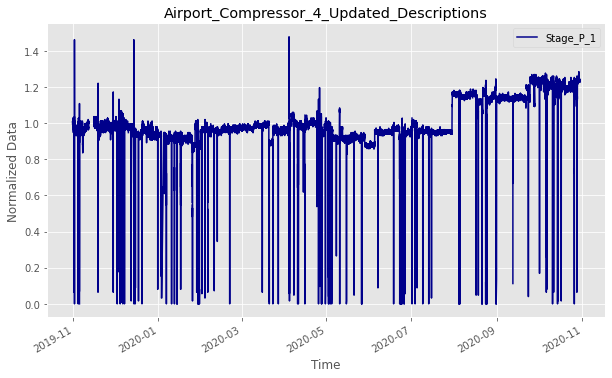

In [31]:
df2.plot(kind='line', x='Stage_P_1_DateTime', y='Stage_P_1', figsize=(10, 6), color='darkblue')

plt.title(file_name)
plt.xlabel('Time')
plt.ylabel('Normalized Data')

plt.show()

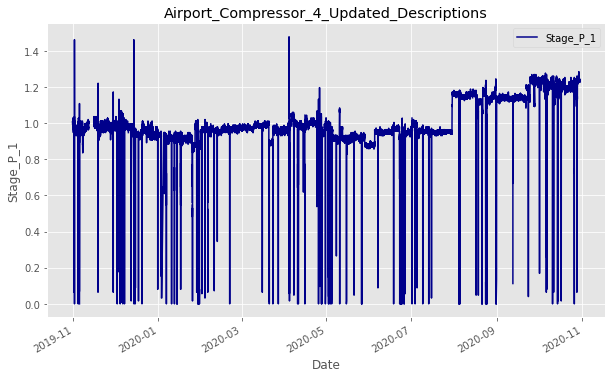

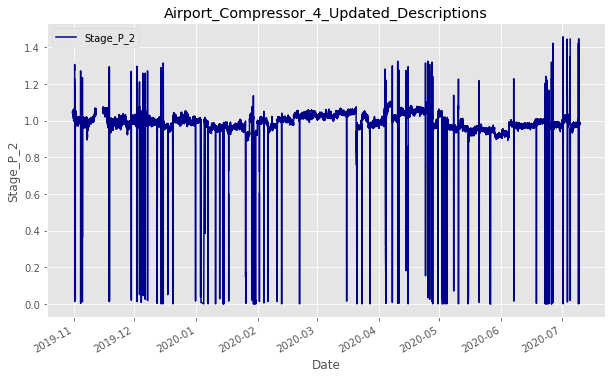

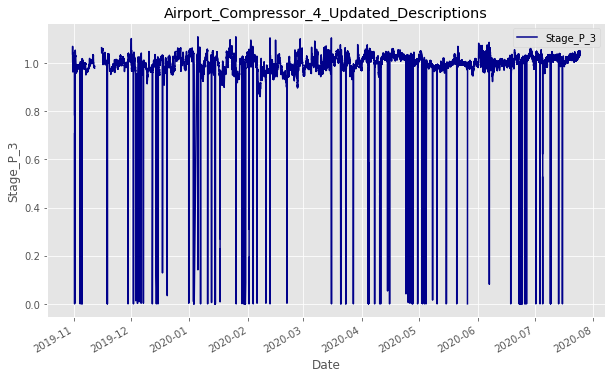

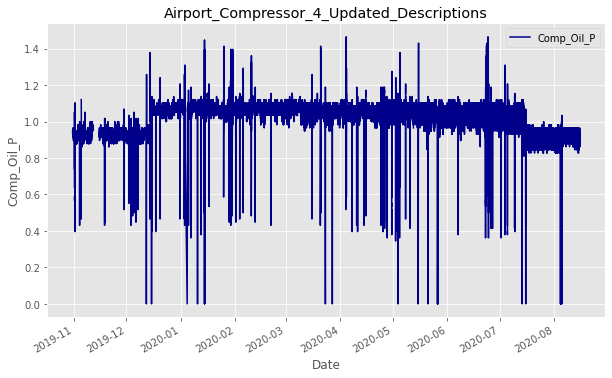

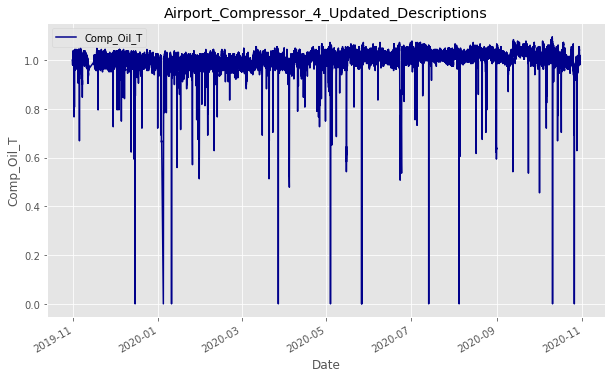

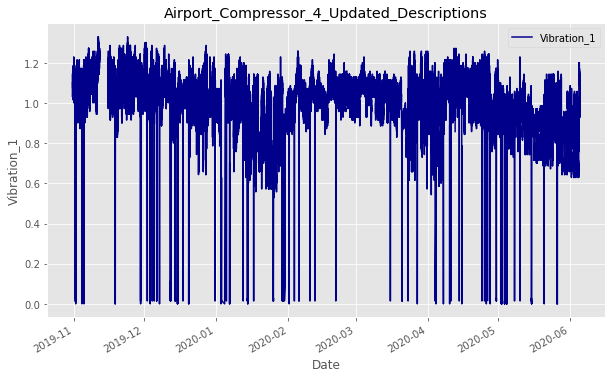

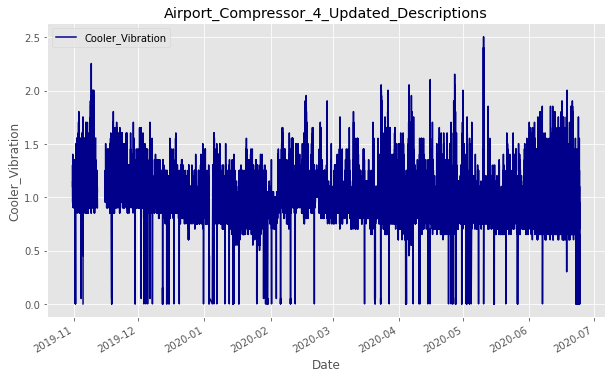

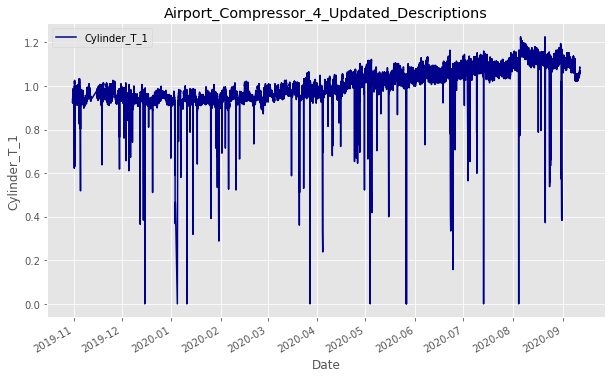

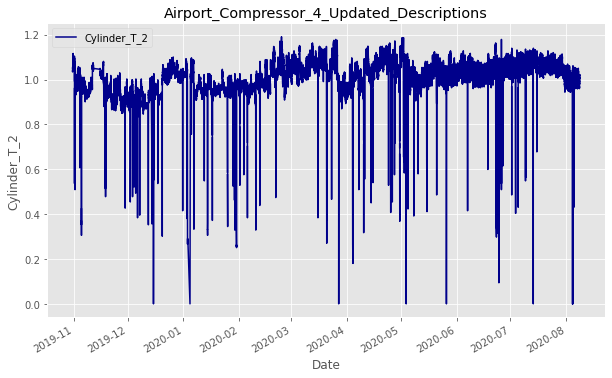

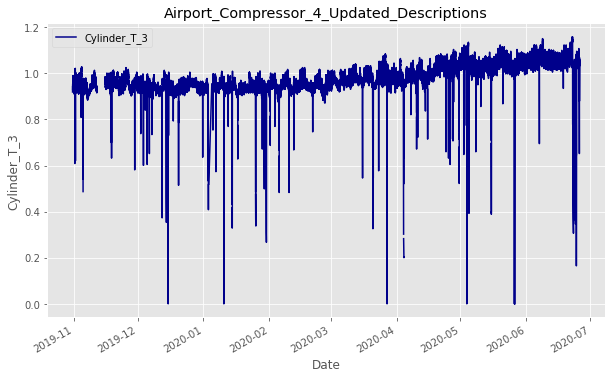

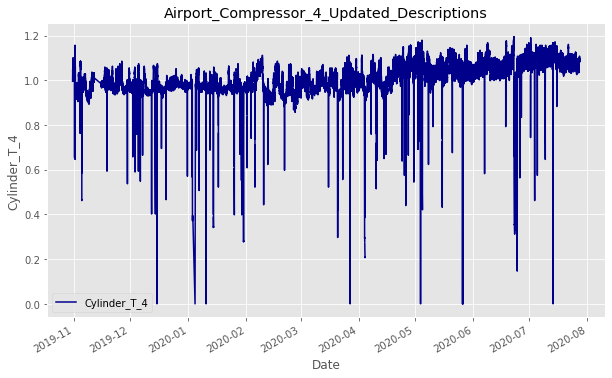

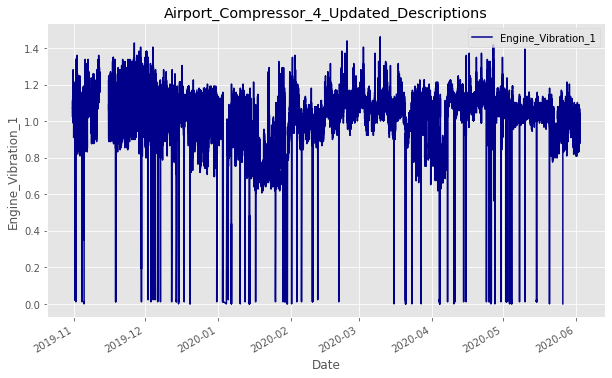

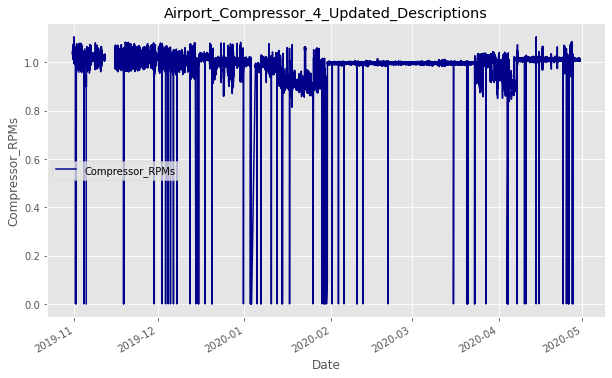

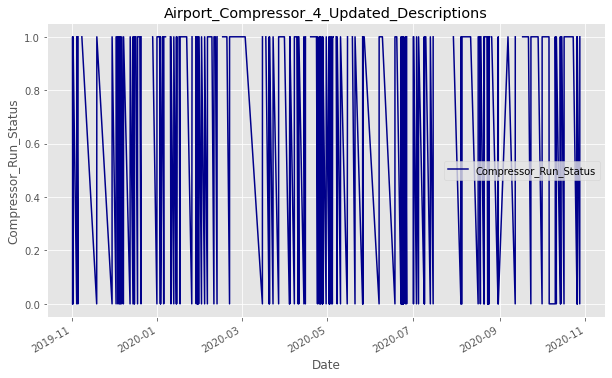

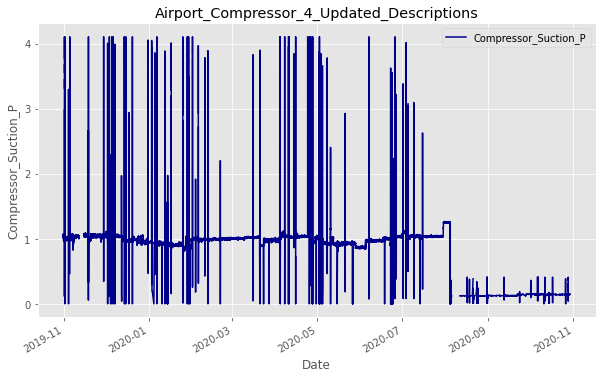

In [32]:
n=0
while n < df2.shape[1]:
    df2.plot(kind='line', x= df2_cols[n], y=df2_cols[n+1], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df2_cols[n+1])
    plt.show()
    n=n+2

In [33]:
# Create new dataframe
df3 = df2.copy(deep=True)
df3.dropna(how='all', inplace=True)
df3.head()

Stage_P_1_DateTime  Stage_P_1  Stage_P_2_DateTime  Stage_P_2  \
1 2019-10-31 09:07:27   0.995917 2019-10-31 09:47:27   1.044921   
2 2019-10-31 09:59:28   1.003948 2019-10-31 09:53:27   1.049945   
3 2019-10-31 10:01:27   0.995917 2019-10-31 09:59:28   1.044921   
4 2019-10-31 10:09:27   1.003948 2019-10-31 10:01:27   1.049945   
5 2019-10-31 10:15:28   0.995917 2019-10-31 10:07:28   1.047433   

   Stage_P_3_DateTime  Stage_P_3 Comp_Oil_P_DateTime  Comp_Oil_P  \
1 2019-10-31 09:49:27   1.038624 2019-10-31 09:51:28    0.947721   
2 2019-10-31 09:53:27   1.043253 2019-10-31 09:53:27    0.930490   
3 2019-10-31 09:55:27   1.045104 2019-10-31 09:55:27    0.947721   
4 2019-10-31 09:59:28   1.038624 2019-10-31 09:57:27    0.930490   
5 2019-10-31 10:01:27   1.042327 2019-10-31 10:01:27    0.947721   

  Comp_Oil_T_DateTime  Comp_Oil_T  ... Cylinder_T_4_DateTime  Cylinder_T_4  \
1 2019-10-31 09:49:27    0.998341  ...   2019-10-31 09:51:28      0.995284   
2 2019-10-31 09:55:27    0.992570  ...   2019-10-31 09:53:27      0.999040   
3 2019-10-31 09:57:27    0.998341  ...   2019-10-31 09:55:27      1.002796   
4 2019-10-31 09:59:28    0.992570  ...   2019-10-31 09:57:27      0.995284   
5 2019-10-31 10:01:27    0.998341  ...   2019-10-31 10:01:27      1.002796   

  Engine_Vibration_1_DateTime  Engine_Vibration_1 Compressor_RPMs_DateTime  \
1         2019-10-31 09:47:27            1.067647      2019-10-31 09:51:28   
2         2019-10-31 09:53:27            1.056409      2019-10-31 09:53:27   
3         2019-10-31 09:55:27            1.067647      2019-10-31 09:55:27   
4         2019-10-31 09:57:27            1.045170      2019-10-31 09:57:27   
5         2019-10-31 09:59:28            1.022693      2019-10-31 09:59:28   

   Compressor_RPMs Compressor_Run_Status_DateTime  Compressor_Run_Status  \
1         1.039596            2019-11-01 10:57:28                    0.0   
2         1.038840            2019-11-01 11:45:26                    1.0   
3         1.044129            2019-11-01 17:17:27                    0.0   
4         1.038840            2019-11-01 18:31:26                    1.0   
5         1.035063            2019-11-04 10:09:12                    0.0   

  Compressor_Suction_P_DateTime  Compressor_Suction_P  
1           2019-10-31 09:51:28              1.046622  
2           2019-10-31 09:53:27              1.054831  
3           2019-10-31 09:55:27              1.046622  
4           2019-10-31 09:57:27              1.054831  
5           2019-10-31 09:59:28              1.042518  

[5 rows x 30 columns]

In [34]:
df3.columns

Index(['Stage_P_1_DateTime', 'Stage_P_1', 'Stage_P_2_DateTime', 'Stage_P_2',
       'Stage_P_3_DateTime', 'Stage_P_3', 'Comp_Oil_P_DateTime', 'Comp_Oil_P',
       'Comp_Oil_T_DateTime', 'Comp_Oil_T', 'Vibration_1_DateTime',
       'Vibration_1', 'Cooler_Vibration_DateTime', 'Cooler_Vibration',
       'Cylinder_T_1_DateTime', 'Cylinder_T_1', 'Cylinder_T_2_DateTime',
       'Cylinder_T_2', 'Cylinder_T_3_DateTime', 'Cylinder_T_3',
       'Cylinder_T_4_DateTime', 'Cylinder_T_4', 'Engine_Vibration_1_DateTime',
       'Engine_Vibration_1', 'Compressor_RPMs_DateTime', 'Compressor_RPMs',
       'Compressor_Run_Status_DateTime', 'Compressor_Run_Status',
       'Compressor_Suction_P_DateTime', 'Compressor_Suction_P'],
      dtype='object')

In [35]:
print(datecols)
print(datacols)

['Stage_P_1_DateTime', 'Stage_P_2_DateTime', 'Stage_P_3_DateTime', 'Comp_Oil_P_DateTime', 'Comp_Oil_T_DateTime', 'Vibration_1_DateTime', 'Cooler_Vibration_DateTime', 'Cylinder_T_1_DateTime', 'Cylinder_T_2_DateTime', 'Cylinder_T_3_DateTime', 'Cylinder_T_4_DateTime', 'Engine_Vibration_1_DateTime', 'Compressor_RPMs_DateTime', 'Compressor_Run_Status_DateTime', 'Compressor_Suction_P_DateTime']
['Stage_P_1', 'Stage_P_2', 'Stage_P_3', 'Comp_Oil_P', 'Comp_Oil_T', 'Vibration_1', 'Cooler_Vibration', 'Cylinder_T_1', 'Cylinder_T_2', 'Cylinder_T_3', 'Cylinder_T_4', 'Engine_Vibration_1', 'Compressor_RPMs', 'Compressor_Run_Status', 'Compressor_Suction_P']


In [36]:
df3_cols = df3.columns
df3_cols

Index(['Stage_P_1_DateTime', 'Stage_P_1', 'Stage_P_2_DateTime', 'Stage_P_2',
       'Stage_P_3_DateTime', 'Stage_P_3', 'Comp_Oil_P_DateTime', 'Comp_Oil_P',
       'Comp_Oil_T_DateTime', 'Comp_Oil_T', 'Vibration_1_DateTime',
       'Vibration_1', 'Cooler_Vibration_DateTime', 'Cooler_Vibration',
       'Cylinder_T_1_DateTime', 'Cylinder_T_1', 'Cylinder_T_2_DateTime',
       'Cylinder_T_2', 'Cylinder_T_3_DateTime', 'Cylinder_T_3',
       'Cylinder_T_4_DateTime', 'Cylinder_T_4', 'Engine_Vibration_1_DateTime',
       'Engine_Vibration_1', 'Compressor_RPMs_DateTime', 'Compressor_RPMs',
       'Compressor_Run_Status_DateTime', 'Compressor_Run_Status',
       'Compressor_Suction_P_DateTime', 'Compressor_Suction_P'],
      dtype='object')

In [37]:
# Create new dataframe with stacked metrics 
df4 = pd.DataFrame({'DateTime':[], 'Metric':[]})

n=0
for col in datacols:
    col = pd.DataFrame(df3[df3_cols[n:n+2]])
    col.rename(columns={df3_cols[n]:'DateTime'}, inplace=True)
    #col.rename(columns={df3_cols[n]:'DateTime', df3_cols[n+1]:'Data'}, inplace=True)
    col['Metric'] = df3_cols[n+1]
    display(col)
    df4=pd.concat([df4, col])
    n=n+2
display(df4)

DateTime  Stage_P_1     Metric
1     2019-10-31 09:07:27   0.995917  Stage_P_1
2     2019-10-31 09:59:28   1.003948  Stage_P_1
3     2019-10-31 10:01:27   0.995917  Stage_P_1
4     2019-10-31 10:09:27   1.003948  Stage_P_1
5     2019-10-31 10:15:28   0.995917  Stage_P_1
...                   ...        ...        ...
99354                 NaT        NaN  Stage_P_1
99355                 NaT        NaN  Stage_P_1
99356                 NaT        NaN  Stage_P_1
99357                 NaT        NaN  Stage_P_1
99358                 NaT        NaN  Stage_P_1

[96661 rows x 3 columns]

DateTime  Stage_P_2     Metric
1     2019-10-31 09:47:27   1.044921  Stage_P_2
2     2019-10-31 09:53:27   1.049945  Stage_P_2
3     2019-10-31 09:59:28   1.044921  Stage_P_2
4     2019-10-31 10:01:27   1.049945  Stage_P_2
5     2019-10-31 10:07:28   1.047433  Stage_P_2
...                   ...        ...        ...
99354 2020-07-10 00:32:37   0.987149  Stage_P_2
99355 2020-07-10 00:38:59   0.979614  Stage_P_2
99356 2020-07-10 00:40:52   0.977102  Stage_P_2
99357 2020-07-10 00:43:04   0.979614  Stage_P_2
99358 2020-07-10 00:46:55   0.982126  Stage_P_2

[96661 rows x 3 columns]

DateTime  Stage_P_3     Metric
1     2019-10-31 09:49:27   1.038624  Stage_P_3
2     2019-10-31 09:53:27   1.043253  Stage_P_3
3     2019-10-31 09:55:27   1.045104  Stage_P_3
4     2019-10-31 09:59:28   1.038624  Stage_P_3
5     2019-10-31 10:01:27   1.042327  Stage_P_3
...                   ...        ...        ...
99354 2020-07-24 20:02:54   1.046956  Stage_P_3
99355 2020-07-24 20:09:59   1.052510  Stage_P_3
99356 2020-07-24 20:13:15   1.051584  Stage_P_3
99357 2020-07-24 20:14:53   1.044179  Stage_P_3
99358 2020-07-24 20:18:54   1.045104  Stage_P_3

[96661 rows x 3 columns]

DateTime  Comp_Oil_P      Metric
1     2019-10-31 09:51:28    0.947721  Comp_Oil_P
2     2019-10-31 09:53:27    0.930490  Comp_Oil_P
3     2019-10-31 09:55:27    0.947721  Comp_Oil_P
4     2019-10-31 09:57:27    0.930490  Comp_Oil_P
5     2019-10-31 10:01:27    0.947721  Comp_Oil_P
...                   ...         ...         ...
99354 2020-08-15 11:46:53    0.930490  Comp_Oil_P
99355 2020-08-15 11:49:07    0.913259  Comp_Oil_P
99356 2020-08-15 11:50:59    0.947721  Comp_Oil_P
99357 2020-08-15 11:52:58    0.878796  Comp_Oil_P
99358 2020-08-15 11:54:53    0.913259  Comp_Oil_P

[96661 rows x 3 columns]

DateTime  Comp_Oil_T      Metric
1     2019-10-31 09:49:27    0.998341  Comp_Oil_T
2     2019-10-31 09:55:27    0.992570  Comp_Oil_T
3     2019-10-31 09:57:27    0.998341  Comp_Oil_T
4     2019-10-31 09:59:28    0.992570  Comp_Oil_T
5     2019-10-31 10:01:27    0.998341  Comp_Oil_T
...                   ...         ...         ...
99354 2020-10-30 09:21:26    1.004112  Comp_Oil_T
99355 2020-10-30 09:25:33    1.009883  Comp_Oil_T
99356 2020-10-30 09:37:32    1.015653  Comp_Oil_T
99357 2020-10-30 09:39:32    1.009883  Comp_Oil_T
99358 2020-10-30 09:45:32    1.004112  Comp_Oil_T

[96661 rows x 3 columns]

DateTime  Vibration_1       Metric
1     2019-10-31 09:51:28     1.100869  Vibration_1
2     2019-10-31 09:53:27     1.072275  Vibration_1
3     2019-10-31 09:55:27     1.057978  Vibration_1
4     2019-10-31 09:57:27     1.115166  Vibration_1
5     2019-10-31 09:59:28     1.086572  Vibration_1
...                   ...          ...          ...
99354 2020-06-05 05:36:00     0.929305  Vibration_1
99355 2020-06-05 05:37:40     1.000790  Vibration_1
99356 2020-06-05 05:39:55     0.957899  Vibration_1
99357 2020-06-05 05:41:39     0.972196  Vibration_1
99358 2020-06-05 05:43:39     1.000790  Vibration_1

[96661 rows x 3 columns]

DateTime  Cooler_Vibration            Metric
1     2019-10-31 09:45:27          1.101538  Cooler_Vibration
2     2019-10-31 09:55:27          1.251748  Cooler_Vibration
3     2019-10-31 09:57:27          1.101538  Cooler_Vibration
4     2019-10-31 09:59:28          1.051468  Cooler_Vibration
5     2019-10-31 10:01:27          1.301818  Cooler_Vibration
...                   ...               ...               ...
99354 2020-06-24 13:16:41          0.851189  Cooler_Vibration
99355 2020-06-24 13:18:54          0.951329  Cooler_Vibration
99356 2020-06-24 13:22:55          0.851189  Cooler_Vibration
99357 2020-06-24 13:26:44          0.901259  Cooler_Vibration
99358 2020-06-24 13:28:54          0.851189  Cooler_Vibration

[96661 rows x 3 columns]

DateTime  Cylinder_T_1        Metric
1     2019-10-31 09:51:28      0.925900  Cylinder_T_1
2     2019-10-31 09:53:27      0.922058  Cylinder_T_1
3     2019-10-31 09:55:27      0.925900  Cylinder_T_1
4     2019-10-31 09:57:27      0.929742  Cylinder_T_1
5     2019-10-31 10:03:27      0.922058  Cylinder_T_1
...                   ...           ...           ...
99354 2020-09-11 15:34:02      1.083418  Cylinder_T_1
99355 2020-09-11 15:42:01      1.087260  Cylinder_T_1
99356 2020-09-11 15:54:03      1.083418  Cylinder_T_1
99357 2020-09-11 15:55:56      1.087260  Cylinder_T_1
99358 2020-09-11 16:01:58      1.083418  Cylinder_T_1

[96661 rows x 3 columns]

DateTime  Cylinder_T_2        Metric
1     2019-10-31 09:51:28      1.038070  Cylinder_T_2
2     2019-10-31 09:57:27      1.034152  Cylinder_T_2
3     2019-10-31 09:59:28      1.041987  Cylinder_T_2
4     2019-10-31 10:01:27      1.038070  Cylinder_T_2
5     2019-10-31 10:03:27      1.034152  Cylinder_T_2
...                   ...           ...           ...
99354 2020-08-08 13:29:29      1.014566  Cylinder_T_2
99355 2020-08-08 13:35:15      1.018483  Cylinder_T_2
99356 2020-08-08 13:39:13      1.014566  Cylinder_T_2
99357 2020-08-08 13:43:01      1.022401  Cylinder_T_2
99358 2020-08-08 13:45:14      1.018483  Cylinder_T_2

[96661 rows x 3 columns]

DateTime  Cylinder_T_3        Metric
1     2019-10-31 09:51:28      0.918828  Cylinder_T_3
2     2019-10-31 09:53:27      0.922754  Cylinder_T_3
3     2019-10-31 09:55:27      0.926681  Cylinder_T_3
4     2019-10-31 09:57:27      0.930608  Cylinder_T_3
5     2019-10-31 09:59:28      0.934534  Cylinder_T_3
...                   ...           ...           ...
99354 2020-06-26 04:10:55      1.040553  Cylinder_T_3
99355 2020-06-26 04:12:55      1.044480  Cylinder_T_3
99356 2020-06-26 04:14:53      1.040553  Cylinder_T_3
99357 2020-06-26 04:16:52      1.036626  Cylinder_T_3
99358 2020-06-26 04:18:53      1.044480  Cylinder_T_3

[96661 rows x 3 columns]

DateTime  Cylinder_T_4        Metric
1     2019-10-31 09:51:28      0.995284  Cylinder_T_4
2     2019-10-31 09:53:27      0.999040  Cylinder_T_4
3     2019-10-31 09:55:27      1.002796  Cylinder_T_4
4     2019-10-31 09:57:27      0.995284  Cylinder_T_4
5     2019-10-31 10:01:27      1.002796  Cylinder_T_4
...                   ...           ...           ...
99354 2020-07-27 22:03:03      1.085423  Cylinder_T_4
99355 2020-07-27 22:14:56      1.081667  Cylinder_T_4
99356 2020-07-27 22:16:41      1.085423  Cylinder_T_4
99357 2020-07-27 22:19:15      1.081667  Cylinder_T_4
99358 2020-07-27 22:28:54      1.085423  Cylinder_T_4

[96661 rows x 3 columns]

DateTime  Engine_Vibration_1              Metric
1     2019-10-31 09:47:27            1.067647  Engine_Vibration_1
2     2019-10-31 09:53:27            1.056409  Engine_Vibration_1
3     2019-10-31 09:55:27            1.067647  Engine_Vibration_1
4     2019-10-31 09:57:27            1.045170  Engine_Vibration_1
5     2019-10-31 09:59:28            1.022693  Engine_Vibration_1
...                   ...                 ...                 ...
99354 2020-06-02 19:35:39            0.988978  Engine_Vibration_1
99355 2020-06-02 19:37:46            1.011455  Engine_Vibration_1
99356 2020-06-02 19:41:54            0.988978  Engine_Vibration_1
99357 2020-06-02 19:43:45            0.977740  Engine_Vibration_1
99358 2020-06-02 19:50:35            1.011455  Engine_Vibration_1

[96661 rows x 3 columns]

DateTime  Compressor_RPMs           Metric
1     2019-10-31 09:51:28         1.039596  Compressor_RPMs
2     2019-10-31 09:53:27         1.038840  Compressor_RPMs
3     2019-10-31 09:55:27         1.044129  Compressor_RPMs
4     2019-10-31 09:57:27         1.038840  Compressor_RPMs
5     2019-10-31 09:59:28         1.035063  Compressor_RPMs
...                   ...              ...              ...
99354 2020-04-30 03:03:39         1.006353  Compressor_RPMs
99355 2020-04-30 03:05:54         1.013152  Compressor_RPMs
99356 2020-04-30 03:09:54         1.010130  Compressor_RPMs
99357 2020-04-30 03:11:45         1.011641  Compressor_RPMs
99358 2020-04-30 03:13:54         1.009375  Compressor_RPMs

[96661 rows x 3 columns]

DateTime  Compressor_Run_Status                 Metric
1     2019-11-01 10:57:28                    0.0  Compressor_Run_Status
2     2019-11-01 11:45:26                    1.0  Compressor_Run_Status
3     2019-11-01 17:17:27                    0.0  Compressor_Run_Status
4     2019-11-01 18:31:26                    1.0  Compressor_Run_Status
5     2019-11-04 10:09:12                    0.0  Compressor_Run_Status
...                   ...                    ...                    ...
99354                 NaT                    NaN  Compressor_Run_Status
99355                 NaT                    NaN  Compressor_Run_Status
99356                 NaT                    NaN  Compressor_Run_Status
99357                 NaT                    NaN  Compressor_Run_Status
99358                 NaT                    NaN  Compressor_Run_Status

[96661 rows x 3 columns]

DateTime  Compressor_Suction_P                Metric
1     2019-10-31 09:51:28              1.046622  Compressor_Suction_P
2     2019-10-31 09:53:27              1.054831  Compressor_Suction_P
3     2019-10-31 09:55:27              1.046622  Compressor_Suction_P
4     2019-10-31 09:57:27              1.054831  Compressor_Suction_P
5     2019-10-31 09:59:28              1.042518  Compressor_Suction_P
...                   ...                   ...                   ...
99354                 NaT                   NaN  Compressor_Suction_P
99355                 NaT                   NaN  Compressor_Suction_P
99356                 NaT                   NaN  Compressor_Suction_P
99357                 NaT                   NaN  Compressor_Suction_P
99358                 NaT                   NaN  Compressor_Suction_P

[96661 rows x 3 columns]

DateTime                Metric  Stage_P_1  Stage_P_2  \
1     2019-10-31 09:07:27             Stage_P_1   0.995917        NaN   
2     2019-10-31 09:59:28             Stage_P_1   1.003948        NaN   
3     2019-10-31 10:01:27             Stage_P_1   0.995917        NaN   
4     2019-10-31 10:09:27             Stage_P_1   1.003948        NaN   
5     2019-10-31 10:15:28             Stage_P_1   0.995917        NaN   
...                   ...                   ...        ...        ...   
99354                 NaT  Compressor_Suction_P        NaN        NaN   
99355                 NaT  Compressor_Suction_P        NaN        NaN   
99356                 NaT  Compressor_Suction_P        NaN        NaN   
99357                 NaT  Compressor_Suction_P        NaN        NaN   
99358                 NaT  Compressor_Suction_P        NaN        NaN   

       Stage_P_3  Comp_Oil_P  Comp_Oil_T  Vibration_1  Cooler_Vibration  \
1            NaN         NaN         NaN          NaN               NaN   
2            NaN         NaN         NaN          NaN               NaN   
3            NaN         NaN         NaN          NaN               NaN   
4            NaN         NaN         NaN          NaN               NaN   
5            NaN         NaN         NaN          NaN               NaN   
...          ...         ...         ...          ...               ...   
99354        NaN         NaN         NaN          NaN               NaN   
99355        NaN         NaN         NaN          NaN               NaN   
99356        NaN         NaN         NaN          NaN               NaN   
99357        NaN         NaN         NaN          NaN               NaN   
99358        NaN         NaN         NaN          NaN               NaN   

       Cylinder_T_1  Cylinder_T_2  Cylinder_T_3  Cylinder_T_4  \
1               NaN           NaN           NaN           NaN   
2               NaN           NaN           NaN           NaN   
3               NaN           NaN           NaN           NaN   
4               NaN           NaN           NaN           NaN   
5               NaN           NaN           NaN           NaN   
...             ...           ...           ...           ...   
99354           NaN           NaN           NaN           NaN   
99355           NaN           NaN           NaN           NaN   
99356           NaN           NaN           NaN           NaN   
99357           NaN           NaN           NaN           NaN   
99358           NaN           NaN           NaN           NaN   

       Engine_Vibration_1  Compressor_RPMs  Compressor_Run_Status  \
1                     NaN              NaN                    NaN   
2                     NaN              NaN                    NaN   
3                     NaN              NaN                    NaN   
4                     NaN              NaN                    NaN   
5                     NaN              NaN                    NaN   
...                   ...              ...                    ...   
99354                 NaN              NaN                    NaN   
99355                 NaN              NaN                    NaN   
99356                 NaN              NaN                    NaN   
99357                 NaN              NaN                    NaN   
99358                 NaN              NaN                    NaN   

       Compressor_Suction_P  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
5                       NaN  
...                     ...  
99354                   NaN  
99355                   NaN  
99356                   NaN  
99357                   NaN  
99358                   NaN  

[1449915 rows x 17 columns]

In [38]:
# Round datetime to nearest minute
df4['DateTime'] = df4['DateTime'].values.astype('<M8[m]')
display(df4)

DateTime                Metric  Stage_P_1  Stage_P_2  \
1     2019-10-31 09:07:00             Stage_P_1   0.995917        NaN   
2     2019-10-31 09:59:00             Stage_P_1   1.003948        NaN   
3     2019-10-31 10:01:00             Stage_P_1   0.995917        NaN   
4     2019-10-31 10:09:00             Stage_P_1   1.003948        NaN   
5     2019-10-31 10:15:00             Stage_P_1   0.995917        NaN   
...                   ...                   ...        ...        ...   
99354                 NaT  Compressor_Suction_P        NaN        NaN   
99355                 NaT  Compressor_Suction_P        NaN        NaN   
99356                 NaT  Compressor_Suction_P        NaN        NaN   
99357                 NaT  Compressor_Suction_P        NaN        NaN   
99358                 NaT  Compressor_Suction_P        NaN        NaN   

       Stage_P_3  Comp_Oil_P  Comp_Oil_T  Vibration_1  Cooler_Vibration  \
1            NaN         NaN         NaN          NaN               NaN   
2            NaN         NaN         NaN          NaN               NaN   
3            NaN         NaN         NaN          NaN               NaN   
4            NaN         NaN         NaN          NaN               NaN   
5            NaN         NaN         NaN          NaN               NaN   
...          ...         ...         ...          ...               ...   
99354        NaN         NaN         NaN          NaN               NaN   
99355        NaN         NaN         NaN          NaN               NaN   
99356        NaN         NaN         NaN          NaN               NaN   
99357        NaN         NaN         NaN          NaN               NaN   
99358        NaN         NaN         NaN          NaN               NaN   

       Cylinder_T_1  Cylinder_T_2  Cylinder_T_3  Cylinder_T_4  \
1               NaN           NaN           NaN           NaN   
2               NaN           NaN           NaN           NaN   
3               NaN           NaN           NaN           NaN   
4               NaN           NaN           NaN           NaN   
5               NaN           NaN           NaN           NaN   
...             ...           ...           ...           ...   
99354           NaN           NaN           NaN           NaN   
99355           NaN           NaN           NaN           NaN   
99356           NaN           NaN           NaN           NaN   
99357           NaN           NaN           NaN           NaN   
99358           NaN           NaN           NaN           NaN   

       Engine_Vibration_1  Compressor_RPMs  Compressor_Run_Status  \
1                     NaN              NaN                    NaN   
2                     NaN              NaN                    NaN   
3                     NaN              NaN                    NaN   
4                     NaN              NaN                    NaN   
5                     NaN              NaN                    NaN   
...                   ...              ...                    ...   
99354                 NaN              NaN                    NaN   
99355                 NaN              NaN                    NaN   
99356                 NaN              NaN                    NaN   
99357                 NaN              NaN                    NaN   
99358                 NaN              NaN                    NaN   

       Compressor_Suction_P  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
5                       NaN  
...                     ...  
99354                   NaN  
99355                   NaN  
99356                   NaN  
99357                   NaN  
99358                   NaN  

[1449915 rows x 17 columns]

In [39]:
# Drop rows without time data and set index to datetime
df4.dropna(subset=['DateTime'], inplace=True)
#df4.set_index('DateTime', inplace=True)
display(df4)

DateTime                Metric  Stage_P_1  Stage_P_2  \
1     2019-10-31 09:07:00             Stage_P_1   0.995917        NaN   
2     2019-10-31 09:59:00             Stage_P_1   1.003948        NaN   
3     2019-10-31 10:01:00             Stage_P_1   0.995917        NaN   
4     2019-10-31 10:09:00             Stage_P_1   1.003948        NaN   
5     2019-10-31 10:15:00             Stage_P_1   0.995917        NaN   
...                   ...                   ...        ...        ...   
79022 2020-10-29 16:17:00  Compressor_Suction_P        NaN        NaN   
79023 2020-10-29 16:25:00  Compressor_Suction_P        NaN        NaN   
79024 2020-10-29 16:29:00  Compressor_Suction_P        NaN        NaN   
79025 2020-10-29 16:35:00  Compressor_Suction_P        NaN        NaN   
79026 2020-10-29 16:43:00  Compressor_Suction_P        NaN        NaN   

       Stage_P_3  Comp_Oil_P  Comp_Oil_T  Vibration_1  Cooler_Vibration  \
1            NaN         NaN         NaN          NaN               NaN   
2            NaN         NaN         NaN          NaN               NaN   
3            NaN         NaN         NaN          NaN               NaN   
4            NaN         NaN         NaN          NaN               NaN   
5            NaN         NaN         NaN          NaN               NaN   
...          ...         ...         ...          ...               ...   
79022        NaN         NaN         NaN          NaN               NaN   
79023        NaN         NaN         NaN          NaN               NaN   
79024        NaN         NaN         NaN          NaN               NaN   
79025        NaN         NaN         NaN          NaN               NaN   
79026        NaN         NaN         NaN          NaN               NaN   

       Cylinder_T_1  Cylinder_T_2  Cylinder_T_3  Cylinder_T_4  \
1               NaN           NaN           NaN           NaN   
2               NaN           NaN           NaN           NaN   
3               NaN           NaN           NaN           NaN   
4               NaN           NaN           NaN           NaN   
5               NaN           NaN           NaN           NaN   
...             ...           ...           ...           ...   
79022           NaN           NaN           NaN           NaN   
79023           NaN           NaN           NaN           NaN   
79024           NaN           NaN           NaN           NaN   
79025           NaN           NaN           NaN           NaN   
79026           NaN           NaN           NaN           NaN   

       Engine_Vibration_1  Compressor_RPMs  Compressor_Run_Status  \
1                     NaN              NaN                    NaN   
2                     NaN              NaN                    NaN   
3                     NaN              NaN                    NaN   
4                     NaN              NaN                    NaN   
5                     NaN              NaN                    NaN   
...                   ...              ...                    ...   
79022                 NaN              NaN                    NaN   
79023                 NaN              NaN                    NaN   
79024                 NaN              NaN                    NaN   
79025                 NaN              NaN                    NaN   
79026                 NaN              NaN                    NaN   

       Compressor_Suction_P  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
5                       NaN  
...                     ...  
79022              0.147758  
79023              0.151863  
79024              0.147758  
79025              0.151863  
79026              0.147758  

[1317436 rows x 17 columns]

In [40]:
df4_cols=df4.columns
df4_cols

Index(['DateTime', 'Metric', 'Stage_P_1', 'Stage_P_2', 'Stage_P_3',
       'Comp_Oil_P', 'Comp_Oil_T', 'Vibration_1', 'Cooler_Vibration',
       'Cylinder_T_1', 'Cylinder_T_2', 'Cylinder_T_3', 'Cylinder_T_4',
       'Engine_Vibration_1', 'Compressor_RPMs', 'Compressor_Run_Status',
       'Compressor_Suction_P'],
      dtype='object')

In [41]:
df4.dtypes

DateTime                 datetime64[ns]
Metric                           object
Stage_P_1                       float64
Stage_P_2                       float64
Stage_P_3                       float64
Comp_Oil_P                      float64
Comp_Oil_T                      float64
Vibration_1                     float64
Cooler_Vibration                float64
Cylinder_T_1                    float64
Cylinder_T_2                    float64
Cylinder_T_3                    float64
Cylinder_T_4                    float64
Engine_Vibration_1              float64
Compressor_RPMs                 float64
Compressor_Run_Status           float64
Compressor_Suction_P            float64
dtype: object

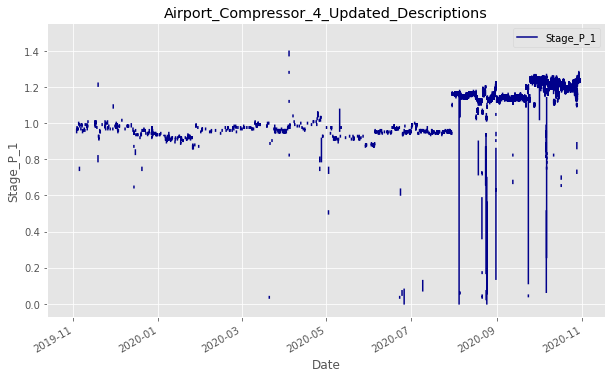

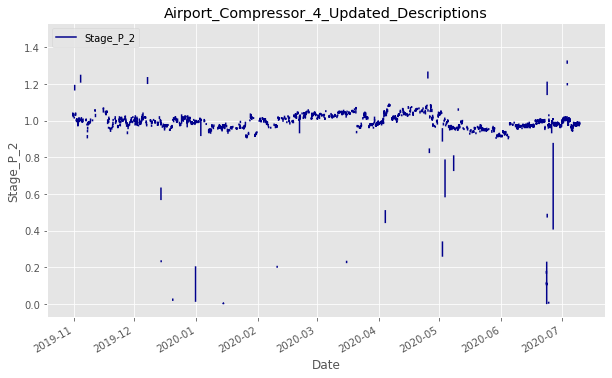

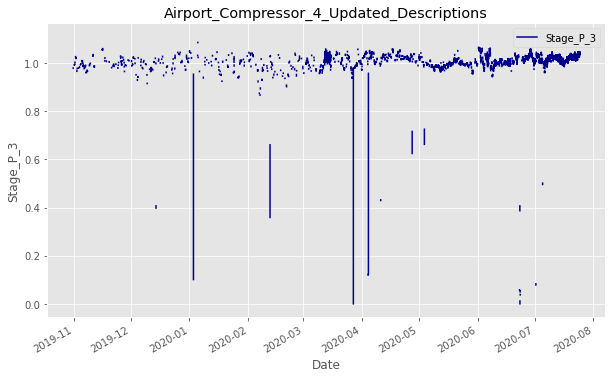

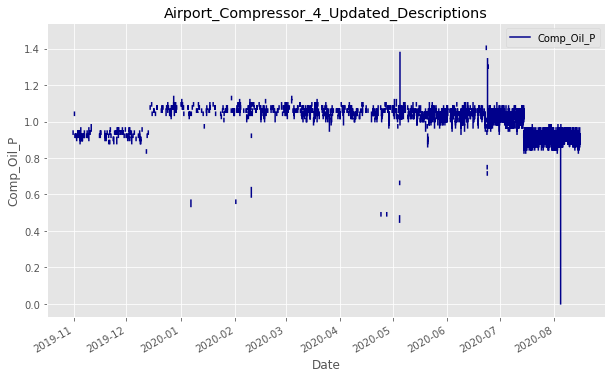

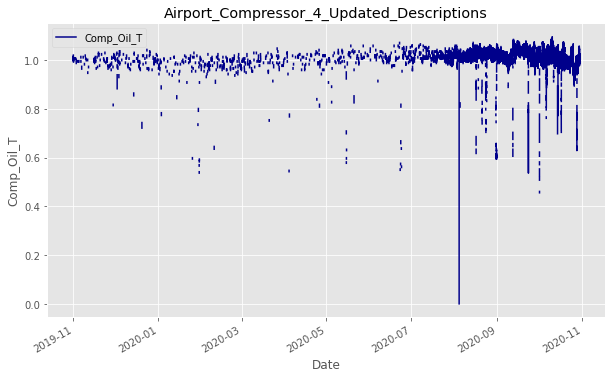

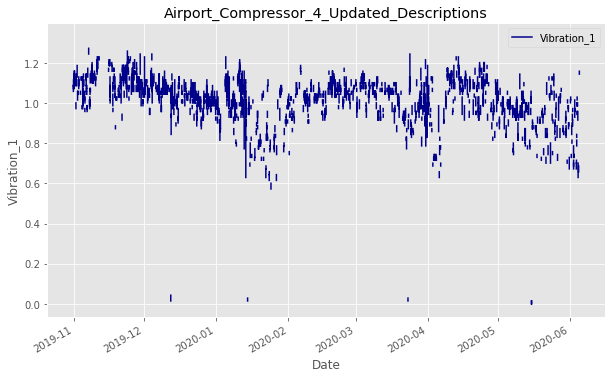

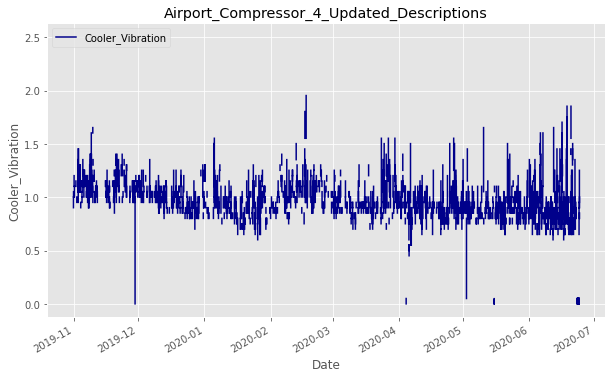

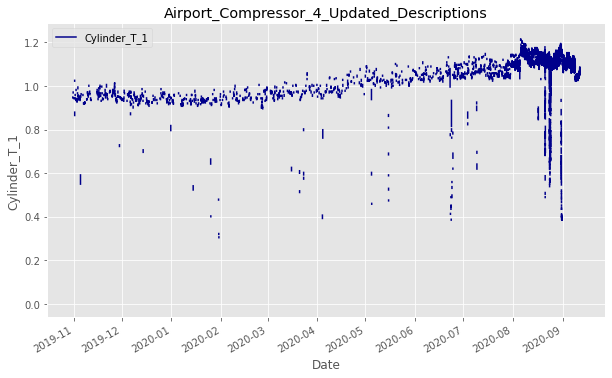

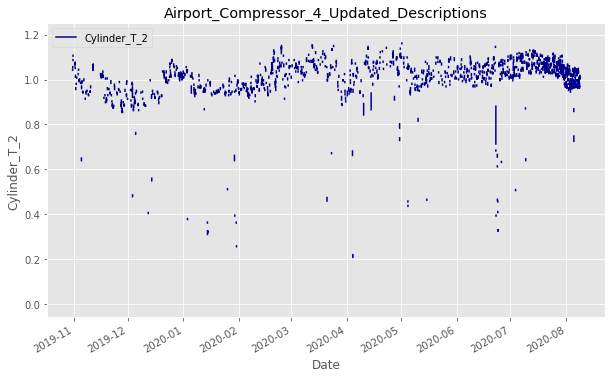

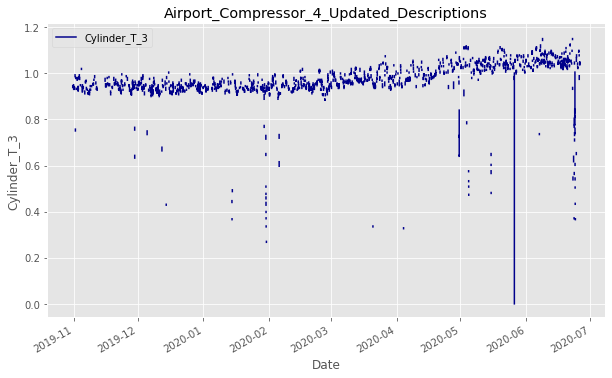

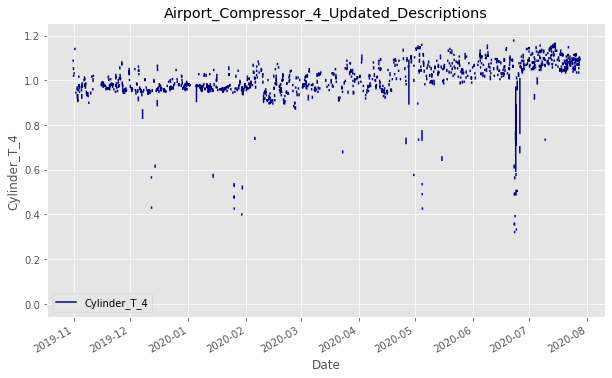

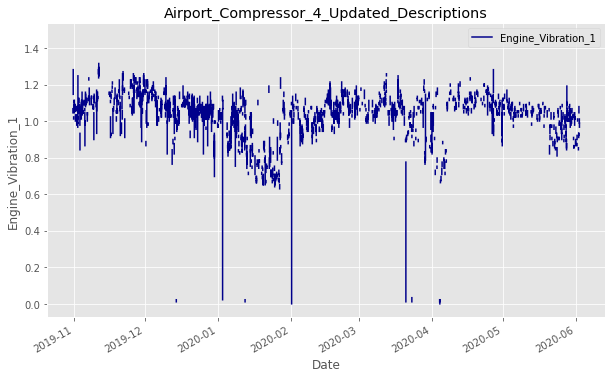

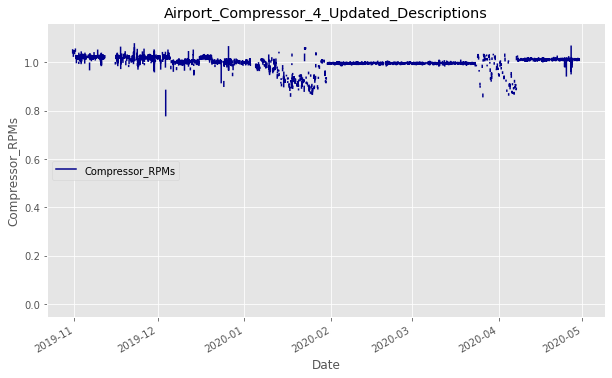

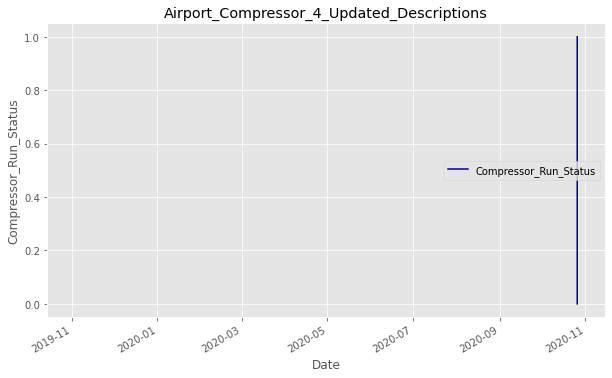

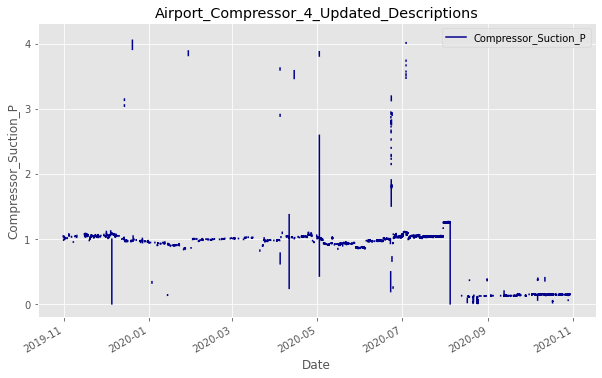

In [42]:
n=2
while n < df4.shape[1]:
    df4.plot(kind='line', x= df4_cols[0], y=df4_cols[n], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df4_cols[n])
    plt.show()
    n=n+1

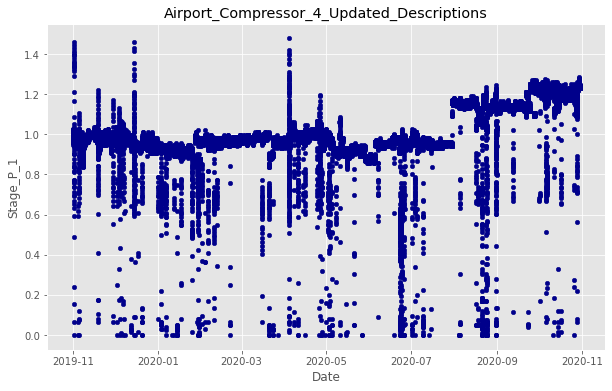

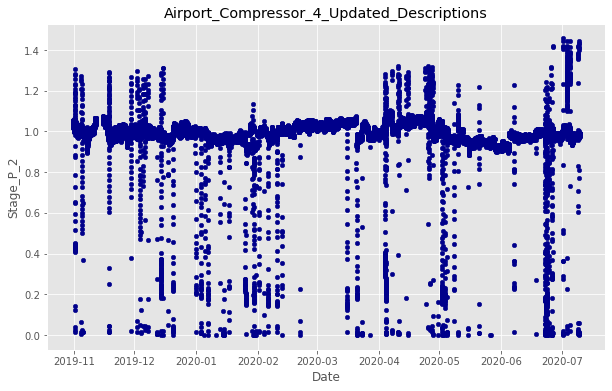

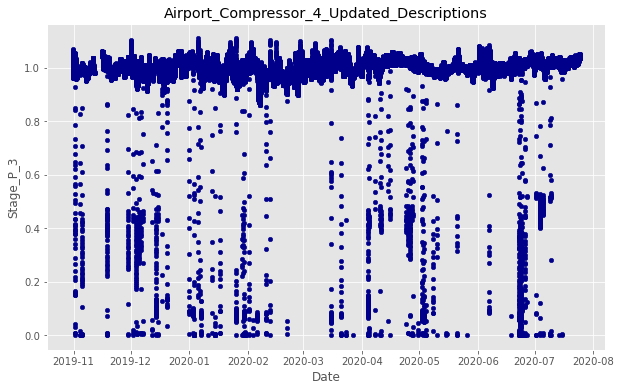

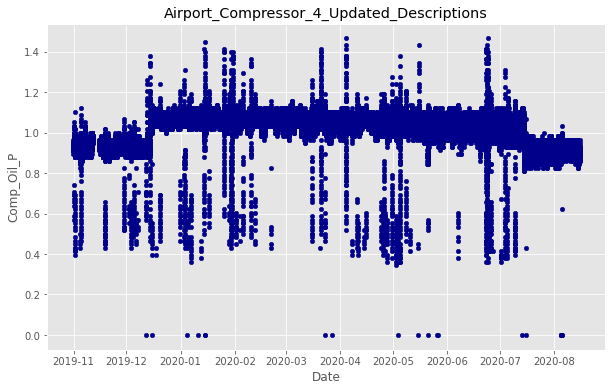

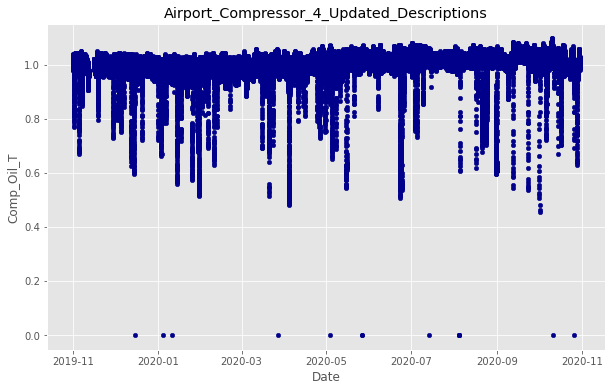

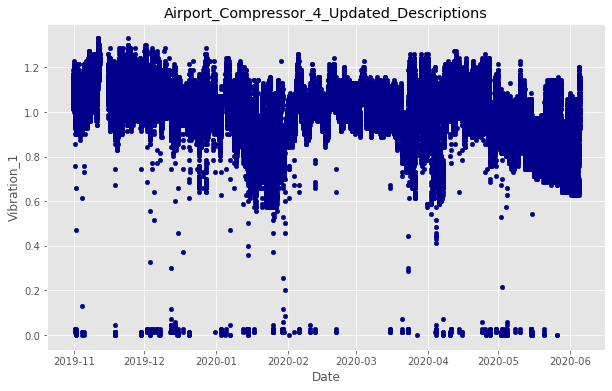

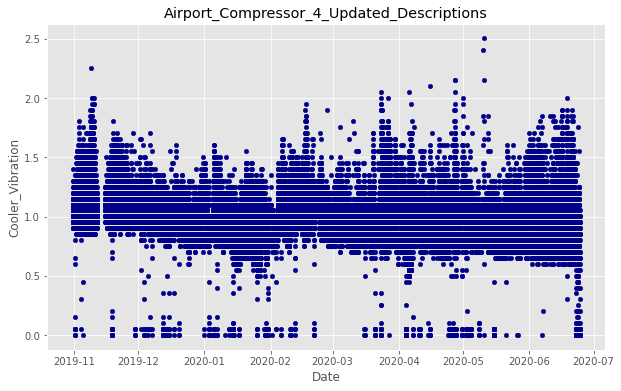

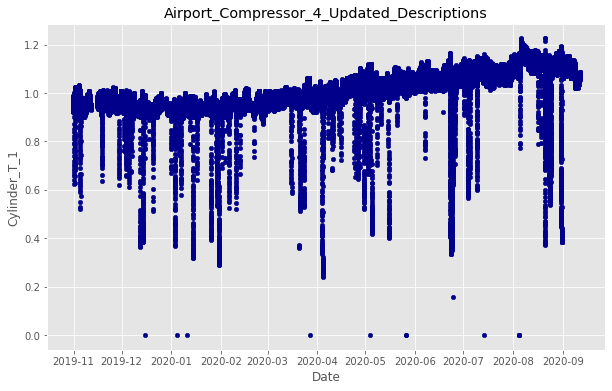

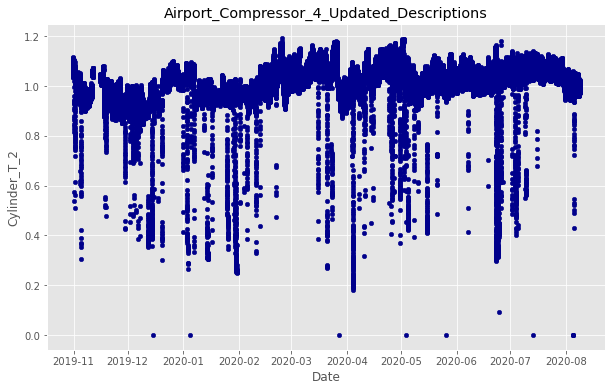

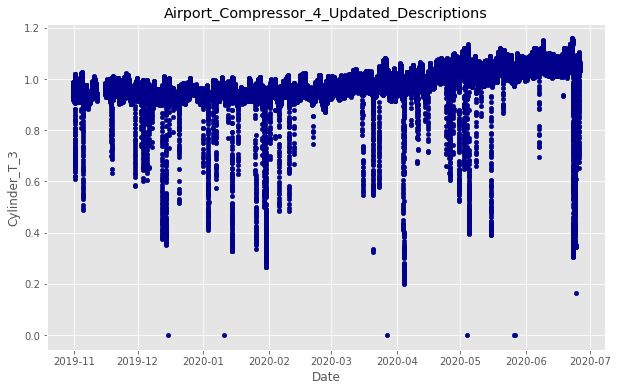

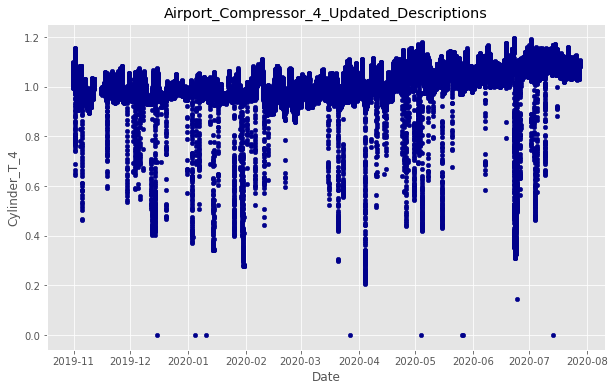

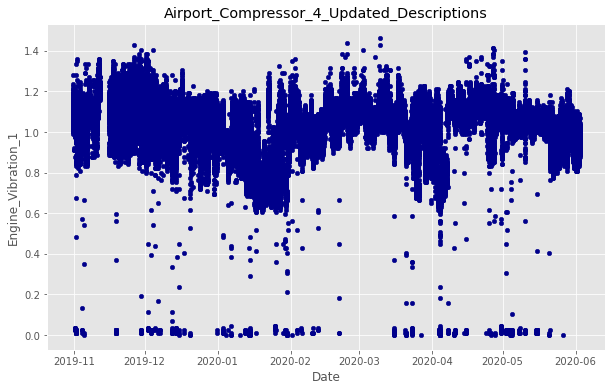

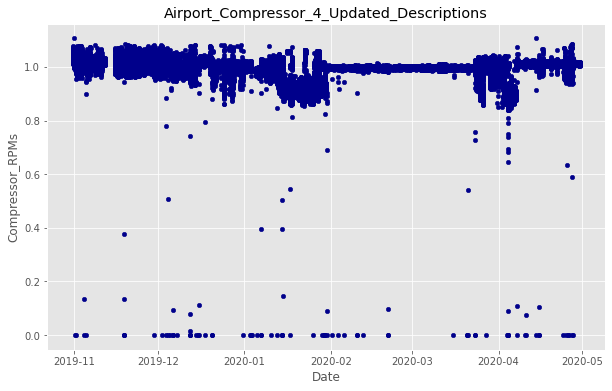

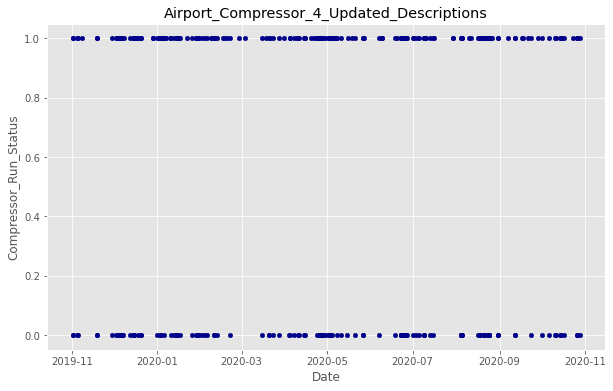

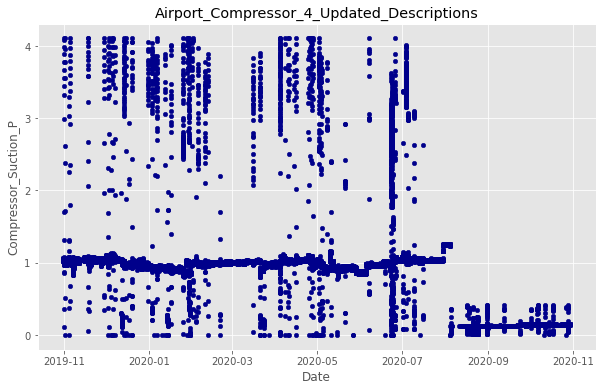

In [43]:
n=2
while n < df4.shape[1]:
    df4.plot(kind='scatter', x= df4_cols[0], y=df4_cols[n], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df4_cols[n])
    plt.show()
    n=n+1

In [44]:
df5 = df4.copy(deep=True)
for col in df4_cols[2:]:
    df5[col+'_RA'] = df5[col].rolling(10).mean()
display(df5)

DateTime                Metric  Stage_P_1  Stage_P_2  \
1     2019-10-31 09:07:00             Stage_P_1   0.995917        NaN   
2     2019-10-31 09:59:00             Stage_P_1   1.003948        NaN   
3     2019-10-31 10:01:00             Stage_P_1   0.995917        NaN   
4     2019-10-31 10:09:00             Stage_P_1   1.003948        NaN   
5     2019-10-31 10:15:00             Stage_P_1   0.995917        NaN   
...                   ...                   ...        ...        ...   
79022 2020-10-29 16:17:00  Compressor_Suction_P        NaN        NaN   
79023 2020-10-29 16:25:00  Compressor_Suction_P        NaN        NaN   
79024 2020-10-29 16:29:00  Compressor_Suction_P        NaN        NaN   
79025 2020-10-29 16:35:00  Compressor_Suction_P        NaN        NaN   
79026 2020-10-29 16:43:00  Compressor_Suction_P        NaN        NaN   

       Stage_P_3  Comp_Oil_P  Comp_Oil_T  Vibration_1  Cooler_Vibration  \
1            NaN         NaN         NaN          NaN               NaN   
2            NaN         NaN         NaN          NaN               NaN   
3            NaN         NaN         NaN          NaN               NaN   
4            NaN         NaN         NaN          NaN               NaN   
5            NaN         NaN         NaN          NaN               NaN   
...          ...         ...         ...          ...               ...   
79022        NaN         NaN         NaN          NaN               NaN   
79023        NaN         NaN         NaN          NaN               NaN   
79024        NaN         NaN         NaN          NaN               NaN   
79025        NaN         NaN         NaN          NaN               NaN   
79026        NaN         NaN         NaN          NaN               NaN   

       Cylinder_T_1  ...  Vibration_1_RA  Cooler_Vibration_RA  \
1               NaN  ...             NaN                  NaN   
2               NaN  ...             NaN                  NaN   
3               NaN  ...             NaN                  NaN   
4               NaN  ...             NaN                  NaN   
5               NaN  ...             NaN                  NaN   
...             ...  ...             ...                  ...   
79022           NaN  ...             NaN                  NaN   
79023           NaN  ...             NaN                  NaN   
79024           NaN  ...             NaN                  NaN   
79025           NaN  ...             NaN                  NaN   
79026           NaN  ...             NaN                  NaN   

       Cylinder_T_1_RA  Cylinder_T_2_RA  Cylinder_T_3_RA  Cylinder_T_4_RA  \
1                  NaN              NaN              NaN              NaN   
2                  NaN              NaN              NaN              NaN   
3                  NaN              NaN              NaN              NaN   
4                  NaN              NaN              NaN              NaN   
5                  NaN              NaN              NaN              NaN   
...                ...              ...              ...              ...   
79022              NaN              NaN              NaN              NaN   
79023              NaN              NaN              NaN              NaN   
79024              NaN              NaN              NaN              NaN   
79025              NaN              NaN              NaN              NaN   
79026              NaN              NaN              NaN              NaN   

       Engine_Vibration_1_RA  Compressor_RPMs_RA  Compressor_Run_Status_RA  \
1                        NaN                 NaN                       NaN   
2                        NaN                 NaN                       NaN   
3                        NaN                 NaN                       NaN   
4                        NaN                 NaN                       NaN   
5                        NaN                 NaN                       NaN   
...                      ...                 ...                 

In [45]:
df5_cols=df5.columns
df5_cols[17:]

Index(['Stage_P_1_RA', 'Stage_P_2_RA', 'Stage_P_3_RA', 'Comp_Oil_P_RA',
       'Comp_Oil_T_RA', 'Vibration_1_RA', 'Cooler_Vibration_RA',
       'Cylinder_T_1_RA', 'Cylinder_T_2_RA', 'Cylinder_T_3_RA',
       'Cylinder_T_4_RA', 'Engine_Vibration_1_RA', 'Compressor_RPMs_RA',
       'Compressor_Run_Status_RA', 'Compressor_Suction_P_RA'],
      dtype='object')

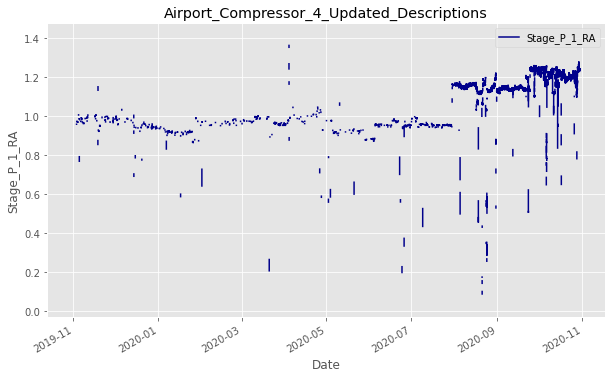

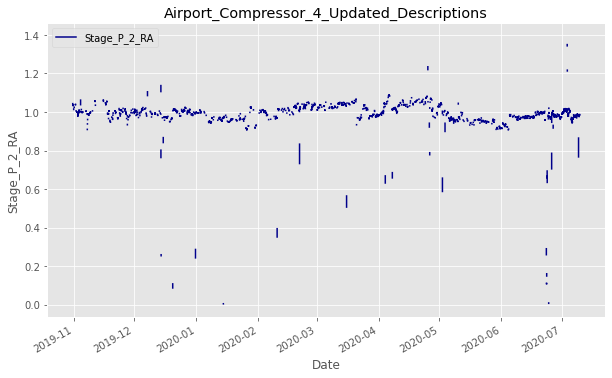

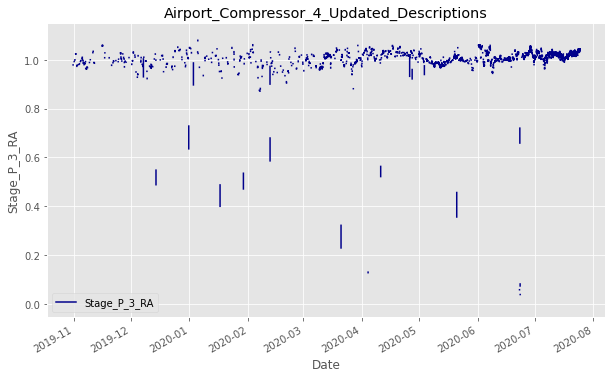

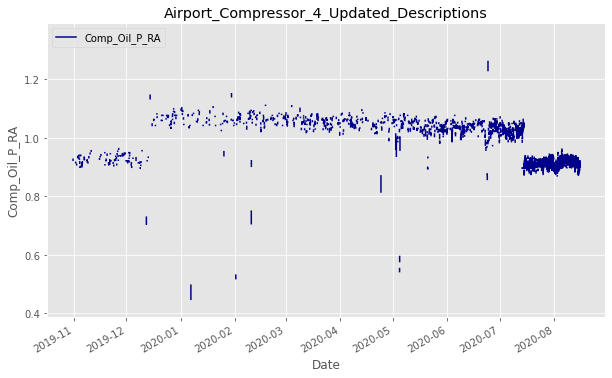

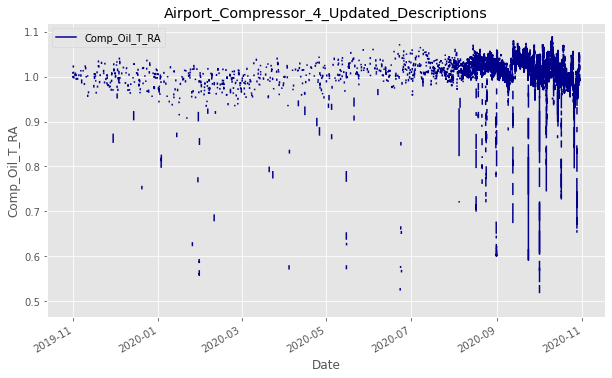

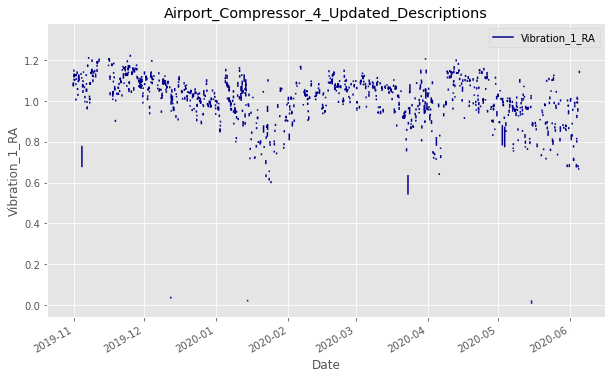

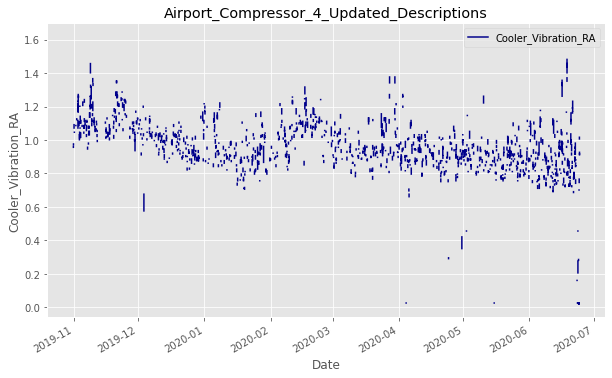

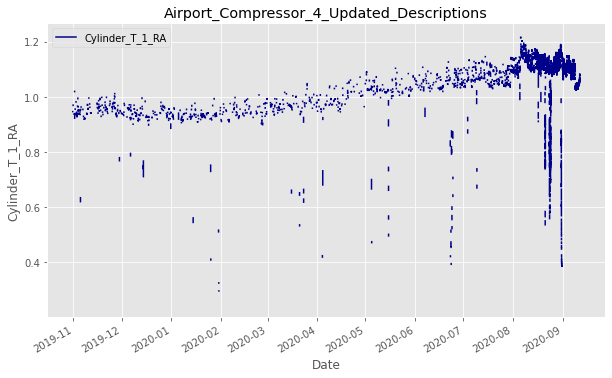

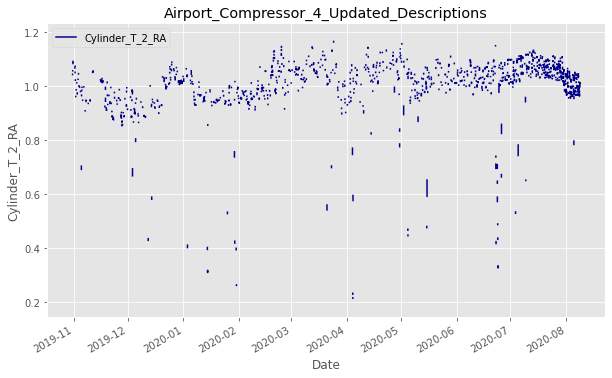

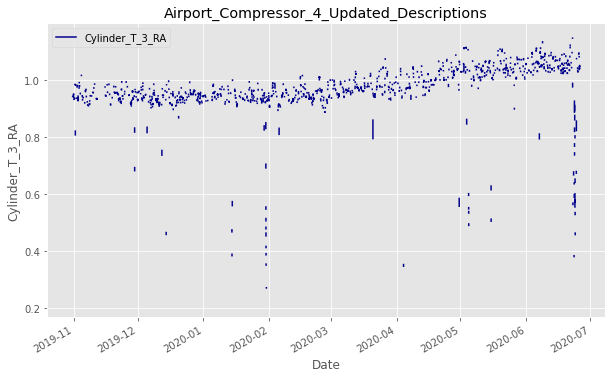

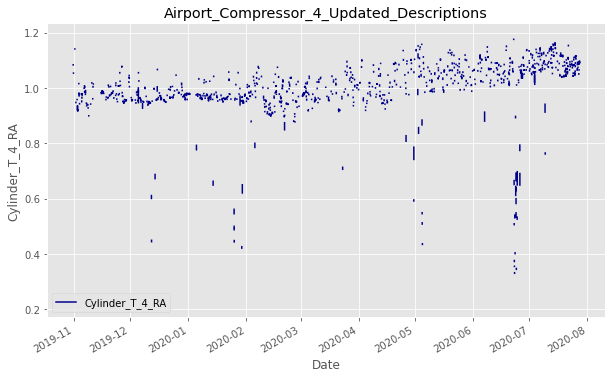

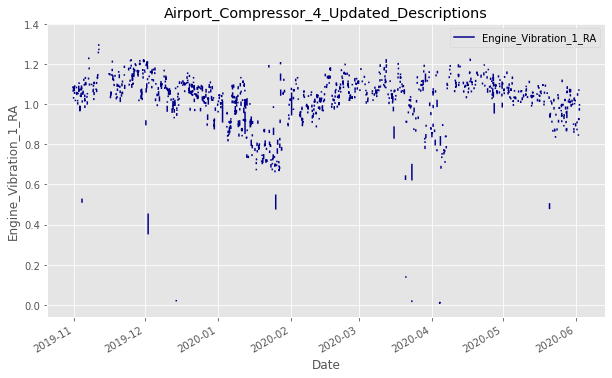

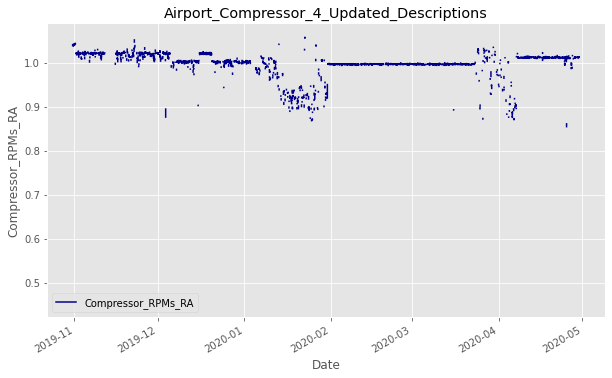

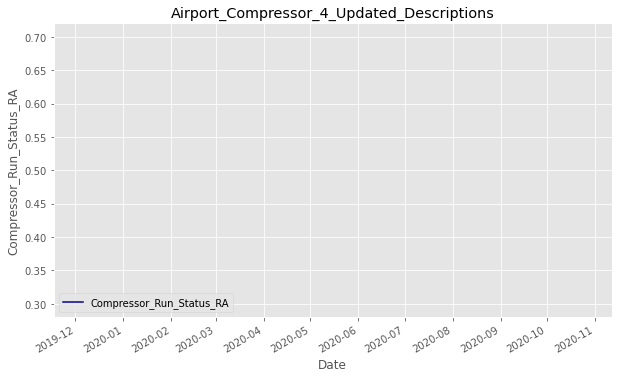

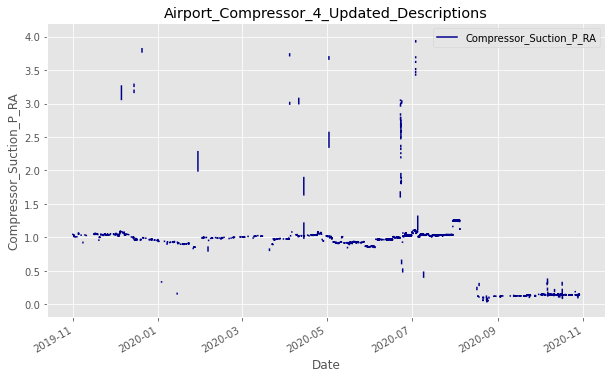

In [46]:
n=17
while n < df5.shape[1]:
    df5.plot(kind='line', x= 'DateTime', y=df5_cols[n], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df5_cols[n])
    plt.show()
    n=n+1

In [47]:
# Group by datetime to nearest minute
df_group = df5.groupby(['DateTime'], as_index=False).mean()
display(df_group)

DateTime  Stage_P_1  Stage_P_2  Stage_P_3  Comp_Oil_P  \
0      2019-10-31 09:07:00   0.995917        NaN        NaN         NaN   
1      2019-10-31 09:45:00        NaN        NaN        NaN         NaN   
2      2019-10-31 09:47:00        NaN   1.044921        NaN         NaN   
3      2019-10-31 09:49:00        NaN        NaN   1.038624         NaN   
4      2019-10-31 09:51:00        NaN        NaN        NaN    0.947721   
...                    ...        ...        ...        ...         ...   
203457 2020-10-30 09:25:00        NaN        NaN        NaN         NaN   
203458 2020-10-30 09:27:00   1.236865        NaN        NaN         NaN   
203459 2020-10-30 09:37:00   1.228833        NaN        NaN         NaN   
203460 2020-10-30 09:39:00   1.236865        NaN        NaN         NaN   
203461 2020-10-30 09:45:00   1.236865        NaN        NaN         NaN   

        Comp_Oil_T  Vibration_1  Cooler_Vibration  Cylinder_T_1  Cylinder_T_2  \
0              NaN          NaN               NaN           NaN           NaN   
1              NaN          NaN          1.101538           NaN           NaN   
2              NaN          NaN               NaN           NaN           NaN   
3         0.998341          NaN               NaN           NaN           NaN   
4              NaN     1.100869               NaN        0.9259       1.03807   
...            ...          ...               ...           ...           ...   
203457    1.009883          NaN               NaN           NaN           NaN   
203458         NaN          NaN               NaN           NaN           NaN   
203459    1.015653          NaN               NaN           NaN           NaN   
203460    1.009883          NaN               NaN           NaN           NaN   
203461    1.004112          NaN               NaN           NaN           NaN   

        ...  Vibration_1_RA  Cooler_Vibration_RA  Cylinder_T_1_RA  \
0       ...             NaN                  NaN              NaN   
1       ...             NaN                  NaN              NaN   
2       ...             NaN                  NaN              NaN   
3       ...             NaN                  NaN              NaN   
4       ...             NaN                  NaN              NaN   
...     ...             ...                  ...              ...   
203457  ...             NaN                  NaN              NaN   
203458  ...             NaN                  NaN              NaN   
203459  ...             NaN                  NaN              NaN   
203460  ...             NaN                  NaN              NaN   
203461  ...             NaN                  NaN              NaN   

        Cylinder_T_2_RA  Cylinder_T_3_RA  Cylinder_T_4_RA  \
0                   NaN              NaN              NaN   
1                   NaN              NaN              NaN   
2                   NaN              NaN              NaN   
3                   NaN              NaN              NaN   
4                   NaN              NaN              NaN   
...                 ...              ...              ...   
203457              NaN              NaN              NaN   
203458              NaN              NaN              NaN   
203459              NaN              NaN              NaN   
203460              NaN              NaN              NaN   
203461              NaN              NaN              NaN   

        Engine_Vibration_1_RA  Compressor_RPMs_RA  Compressor_Run_Status_RA  \
0                         NaN                 NaN                       NaN   
1                         NaN                 NaN                       NaN   
2                         NaN                 NaN                       NaN   
3                         NaN                 NaN                       NaN   
4                         NaN                 NaN                       NaN   
...                       ...                 ...                       ...   
203457                    NaN

In [48]:
df_group_cols = df_group.columns
df_group_cols

Index(['DateTime', 'Stage_P_1', 'Stage_P_2', 'Stage_P_3', 'Comp_Oil_P',
       'Comp_Oil_T', 'Vibration_1', 'Cooler_Vibration', 'Cylinder_T_1',
       'Cylinder_T_2', 'Cylinder_T_3', 'Cylinder_T_4', 'Engine_Vibration_1',
       'Compressor_RPMs', 'Compressor_Run_Status', 'Compressor_Suction_P',
       'Stage_P_1_RA', 'Stage_P_2_RA', 'Stage_P_3_RA', 'Comp_Oil_P_RA',
       'Comp_Oil_T_RA', 'Vibration_1_RA', 'Cooler_Vibration_RA',
       'Cylinder_T_1_RA', 'Cylinder_T_2_RA', 'Cylinder_T_3_RA',
       'Cylinder_T_4_RA', 'Engine_Vibration_1_RA', 'Compressor_RPMs_RA',
       'Compressor_Run_Status_RA', 'Compressor_Suction_P_RA'],
      dtype='object')

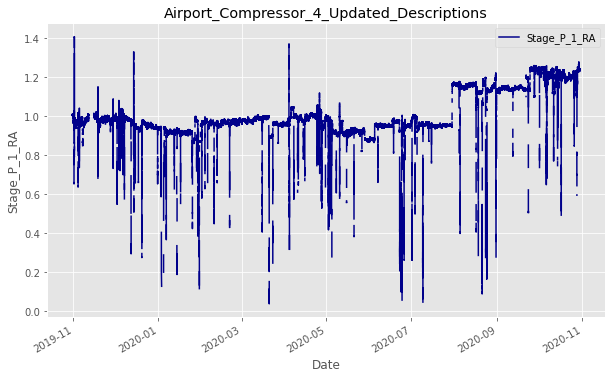

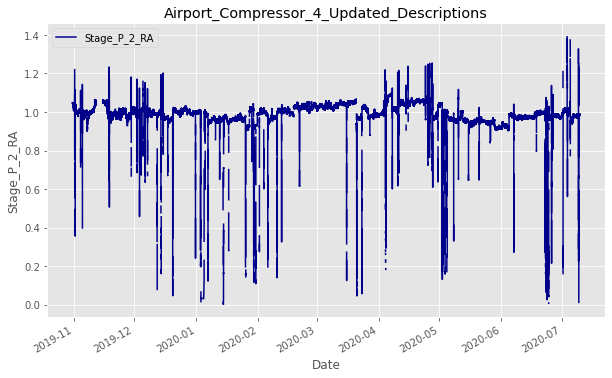

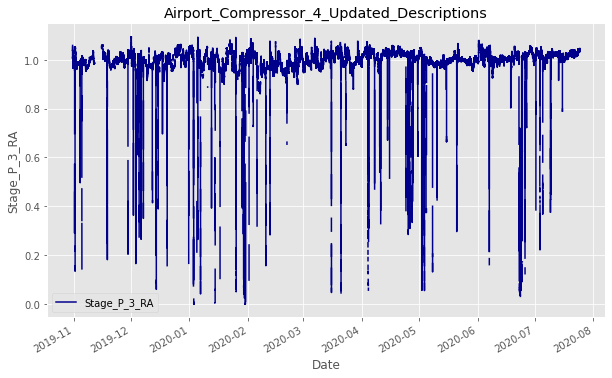

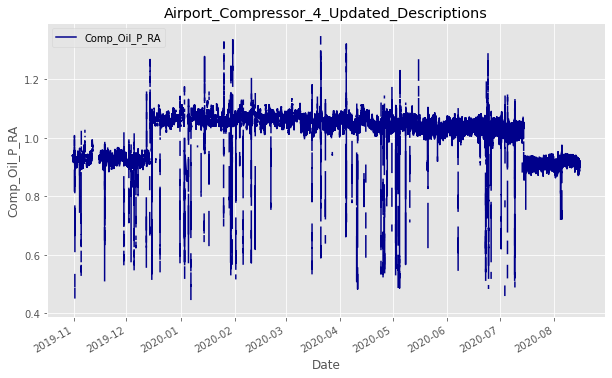

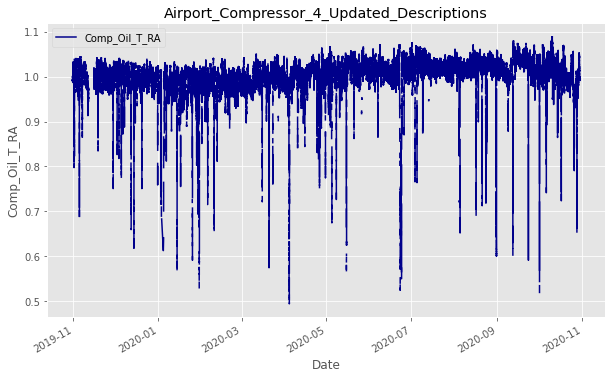

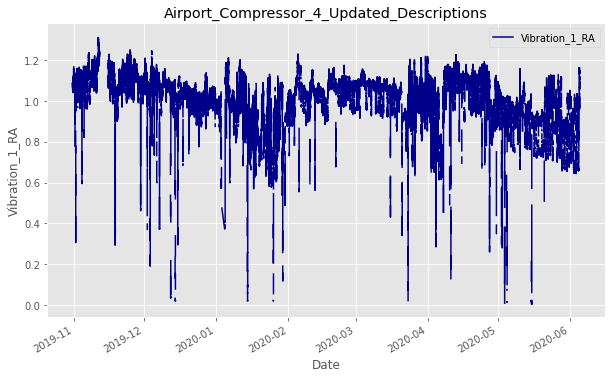

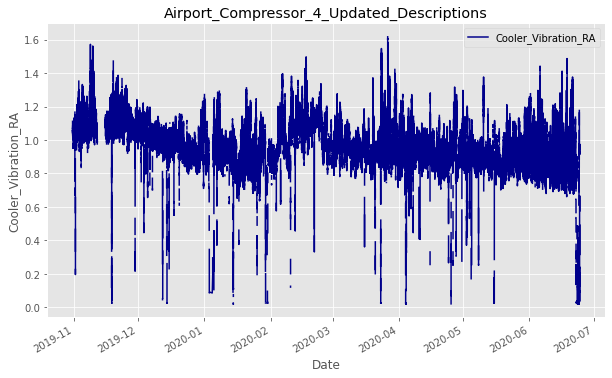

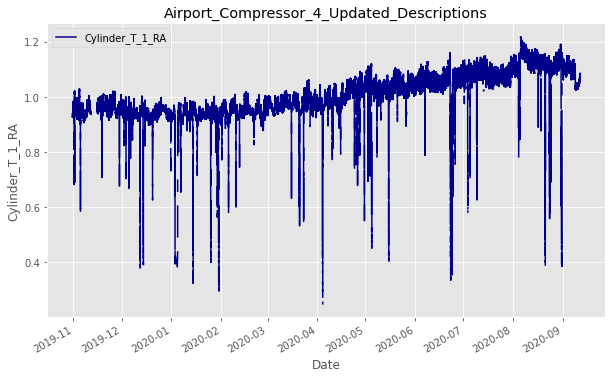

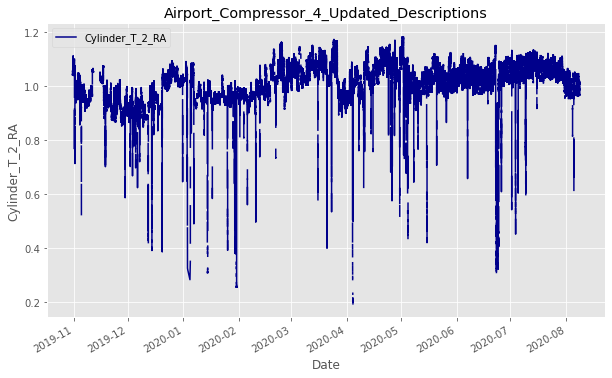

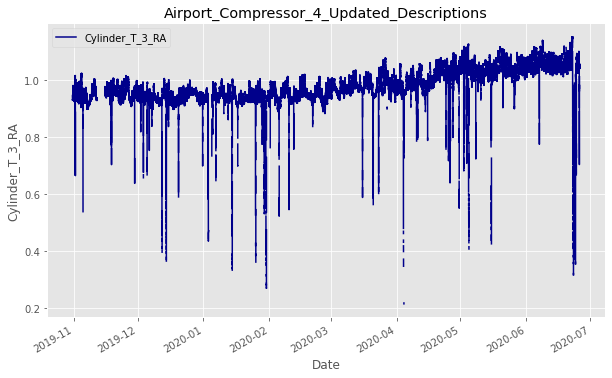

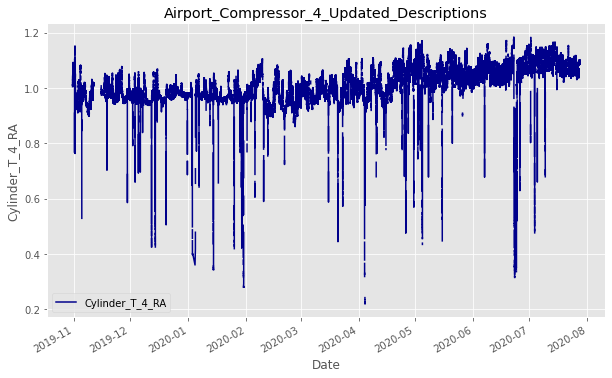

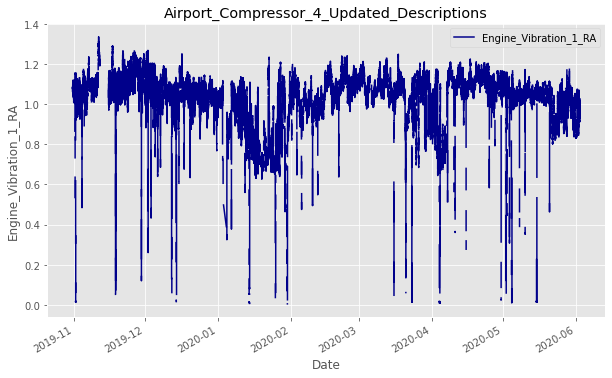

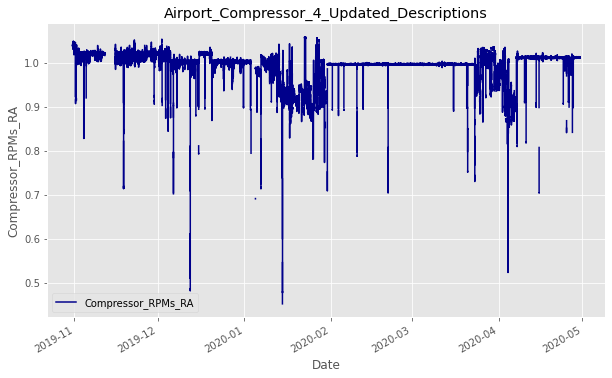

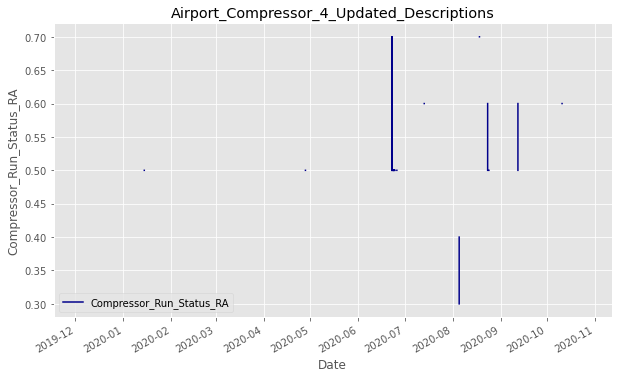

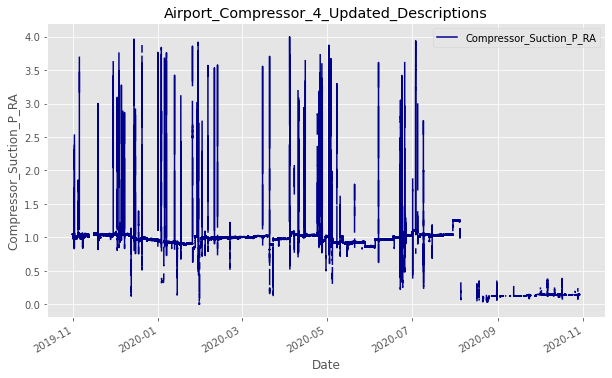

In [49]:
# Plot data grouped by minute
n=16
while n < df_group.shape[1]:
    df_group.plot(kind='line', x= 'DateTime', y=df_group_cols[n], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df_group_cols[n])
    plt.show()
    n=n+1

In [50]:
# Create new dataframe grouped by hour
df_hour = df_group.copy(deep=True)
df_hour['DateTime'] = df_hour['DateTime'].dt.round('H')
display(df_hour)

DateTime  Stage_P_1  Stage_P_2  Stage_P_3  Comp_Oil_P  \
0      2019-10-31 09:00:00   0.995917        NaN        NaN         NaN   
1      2019-10-31 10:00:00        NaN        NaN        NaN         NaN   
2      2019-10-31 10:00:00        NaN   1.044921        NaN         NaN   
3      2019-10-31 10:00:00        NaN        NaN   1.038624         NaN   
4      2019-10-31 10:00:00        NaN        NaN        NaN    0.947721   
...                    ...        ...        ...        ...         ...   
203457 2020-10-30 09:00:00        NaN        NaN        NaN         NaN   
203458 2020-10-30 09:00:00   1.236865        NaN        NaN         NaN   
203459 2020-10-30 10:00:00   1.228833        NaN        NaN         NaN   
203460 2020-10-30 10:00:00   1.236865        NaN        NaN         NaN   
203461 2020-10-30 10:00:00   1.236865        NaN        NaN         NaN   

        Comp_Oil_T  Vibration_1  Cooler_Vibration  Cylinder_T_1  Cylinder_T_2  \
0              NaN          NaN               NaN           NaN           NaN   
1              NaN          NaN          1.101538           NaN           NaN   
2              NaN          NaN               NaN           NaN           NaN   
3         0.998341          NaN               NaN           NaN           NaN   
4              NaN     1.100869               NaN        0.9259       1.03807   
...            ...          ...               ...           ...           ...   
203457    1.009883          NaN               NaN           NaN           NaN   
203458         NaN          NaN               NaN           NaN           NaN   
203459    1.015653          NaN               NaN           NaN           NaN   
203460    1.009883          NaN               NaN           NaN           NaN   
203461    1.004112          NaN               NaN           NaN           NaN   

        ...  Vibration_1_RA  Cooler_Vibration_RA  Cylinder_T_1_RA  \
0       ...             NaN                  NaN              NaN   
1       ...             NaN                  NaN              NaN   
2       ...             NaN                  NaN              NaN   
3       ...             NaN                  NaN              NaN   
4       ...             NaN                  NaN              NaN   
...     ...             ...                  ...              ...   
203457  ...             NaN                  NaN              NaN   
203458  ...             NaN                  NaN              NaN   
203459  ...             NaN                  NaN              NaN   
203460  ...             NaN                  NaN              NaN   
203461  ...             NaN                  NaN              NaN   

        Cylinder_T_2_RA  Cylinder_T_3_RA  Cylinder_T_4_RA  \
0                   NaN              NaN              NaN   
1                   NaN              NaN              NaN   
2                   NaN              NaN              NaN   
3                   NaN              NaN              NaN   
4                   NaN              NaN              NaN   
...                 ...              ...              ...   
203457              NaN              NaN              NaN   
203458              NaN              NaN              NaN   
203459              NaN              NaN              NaN   
203460              NaN              NaN              NaN   
203461              NaN              NaN              NaN   

        Engine_Vibration_1_RA  Compressor_RPMs_RA  Compressor_Run_Status_RA  \
0                         NaN                 NaN                       NaN   
1                         NaN                 NaN                       NaN   
2                         NaN                 NaN                       NaN   
3                         NaN                 NaN                       NaN   
4                         NaN                 NaN                       NaN   
...                       ...                 ...                       ...   
203457                    NaN

In [51]:
# Group by datetime
df_hour = df_hour.groupby(['DateTime'], as_index=False).mean()
display(df_hour)

DateTime  Stage_P_1  Stage_P_2  Stage_P_3  Comp_Oil_P  \
0    2019-10-31 09:00:00   0.995917        NaN        NaN         NaN   
1    2019-10-31 10:00:00   0.999933   1.046177   1.040939    0.939106   
2    2019-10-31 11:00:00   1.004522   1.045460   1.027701    0.939106   
3    2019-10-31 12:00:00   1.006783   1.042095   1.021865    0.939768   
4    2019-10-31 13:00:00   1.006062   1.033116   0.986608    0.939106   
...                  ...        ...        ...        ...         ...   
8606 2020-10-30 06:00:00   1.232849        NaN        NaN         NaN   
8607 2020-10-30 07:00:00   1.232275        NaN        NaN         NaN   
8608 2020-10-30 08:00:00   1.232540        NaN        NaN         NaN   
8609 2020-10-30 09:00:00   1.233295        NaN        NaN         NaN   
8610 2020-10-30 10:00:00   1.234187        NaN        NaN         NaN   

      Comp_Oil_T  Vibration_1  Cooler_Vibration  Cylinder_T_1  Cylinder_T_2  \
0            NaN          NaN               NaN           NaN           NaN   
1       0.993014     1.078295          1.118228      0.928061      1.040355   
2       0.994879     1.079424          1.057359      0.934940      1.050082   
3       0.995456     1.078630          1.047114      0.941054      1.055388   
4       0.990967     1.094271          1.063986      0.952095      1.059614   
...          ...          ...               ...           ...           ...   
8606    1.014211          NaN               NaN           NaN           NaN   
8607    1.008234          NaN               NaN           NaN           NaN   
8608    0.993807          NaN               NaN           NaN           NaN   
8609    1.000024          NaN               NaN           NaN           NaN   
8610    1.009883          NaN               NaN           NaN           NaN   

      ...  Vibration_1_RA  Cooler_Vibration_RA  Cylinder_T_1_RA  \
0     ...             NaN                  NaN              NaN   
1     ...        1.081283             1.108214         0.928315   
2     ...        1.072454             1.060304         0.932702   
3     ...        1.081595             1.061482         0.939112   
4     ...        1.092401             1.056976         0.949545   
...   ...             ...                  ...              ...   
8606  ...             NaN                  NaN              NaN   
8607  ...             NaN                  NaN              NaN   
8608  ...             NaN                  NaN              NaN   
8609  ...             NaN                  NaN              NaN   
8610  ...             NaN                  NaN              NaN   

      Cylinder_T_2_RA  Cylinder_T_3_RA  Cylinder_T_4_RA  \
0                 NaN              NaN              NaN   
1            1.040681         0.929822         1.008161   
2            1.046635         0.934646         1.019202   
3            1.054604         0.944586         1.043276   
4            1.058455         0.949848         1.051057   
...               ...              ...              ...   
8606              NaN              NaN              NaN   
8607              NaN              NaN              NaN   
8608              NaN              NaN              NaN   
8609              NaN              NaN              NaN   
8610              NaN              NaN              NaN   

      Engine_Vibration_1_RA  Compressor_RPMs_RA  Compressor_Run_Status_RA  \
0                       NaN                 NaN                       NaN   
1                  1.064275            1.038500                       NaN   
2                  1.079345            1.040044                       NaN   
3                  1.085673            1.039544                       NaN   
4                  1.095509            1.037475                       NaN   
...                     ...                 ...                       ...   
8606                    NaN                 NaN                       NaN   
8607                    NaN                 NaN             

In [52]:
df_hour_cols = df_hour.columns
print(df_hour_cols)
print(df_hour_cols[16:])

Index(['DateTime', 'Stage_P_1', 'Stage_P_2', 'Stage_P_3', 'Comp_Oil_P',
       'Comp_Oil_T', 'Vibration_1', 'Cooler_Vibration', 'Cylinder_T_1',
       'Cylinder_T_2', 'Cylinder_T_3', 'Cylinder_T_4', 'Engine_Vibration_1',
       'Compressor_RPMs', 'Compressor_Run_Status', 'Compressor_Suction_P',
       'Stage_P_1_RA', 'Stage_P_2_RA', 'Stage_P_3_RA', 'Comp_Oil_P_RA',
       'Comp_Oil_T_RA', 'Vibration_1_RA', 'Cooler_Vibration_RA',
       'Cylinder_T_1_RA', 'Cylinder_T_2_RA', 'Cylinder_T_3_RA',
       'Cylinder_T_4_RA', 'Engine_Vibration_1_RA', 'Compressor_RPMs_RA',
       'Compressor_Run_Status_RA', 'Compressor_Suction_P_RA'],
      dtype='object')
Index(['Stage_P_1_RA', 'Stage_P_2_RA', 'Stage_P_3_RA', 'Comp_Oil_P_RA',
       'Comp_Oil_T_RA', 'Vibration_1_RA', 'Cooler_Vibration_RA',
       'Cylinder_T_1_RA', 'Cylinder_T_2_RA', 'Cylinder_T_3_RA',
       'Cylinder_T_4_RA', 'Engine_Vibration_1_RA', 'Compressor_RPMs_RA',
       'Compressor_Run_Status_RA', 'Compressor_Suction_P_RA'],
      dt

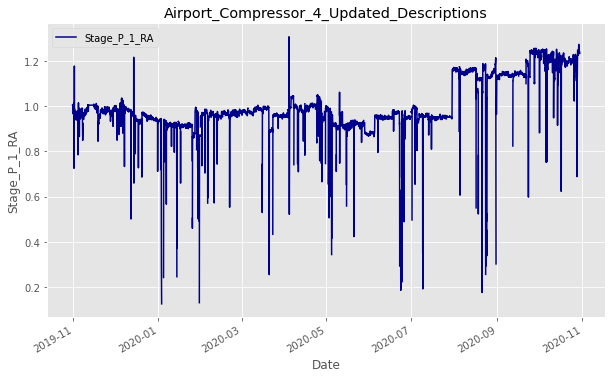

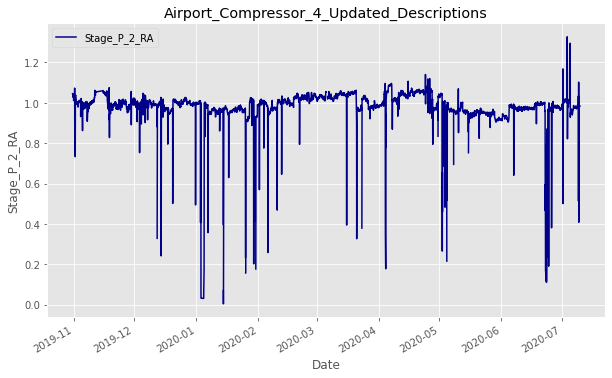

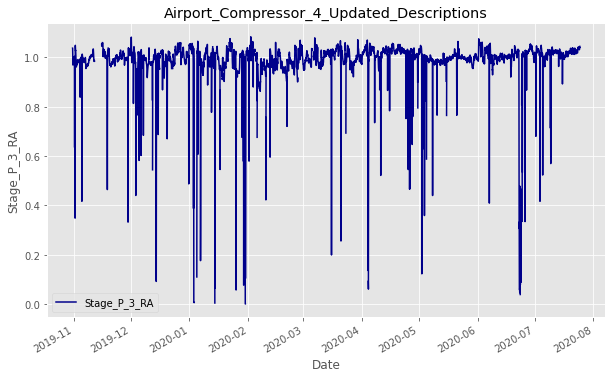

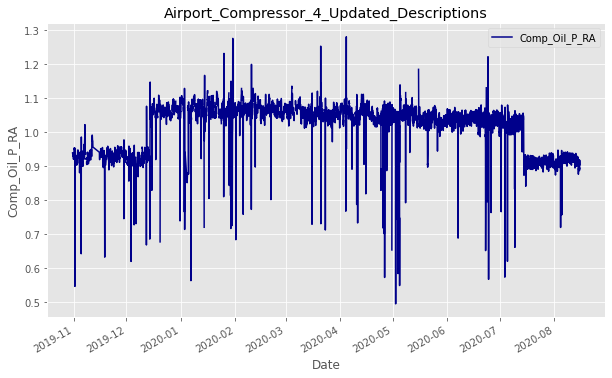

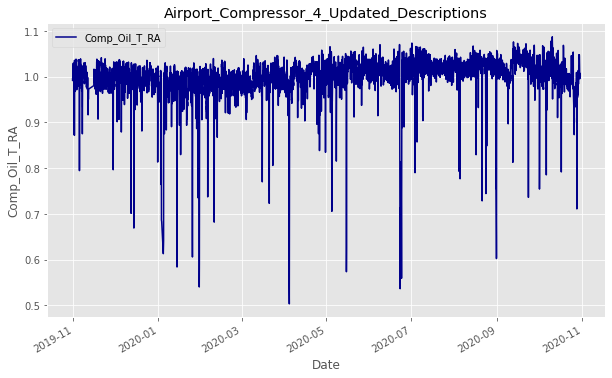

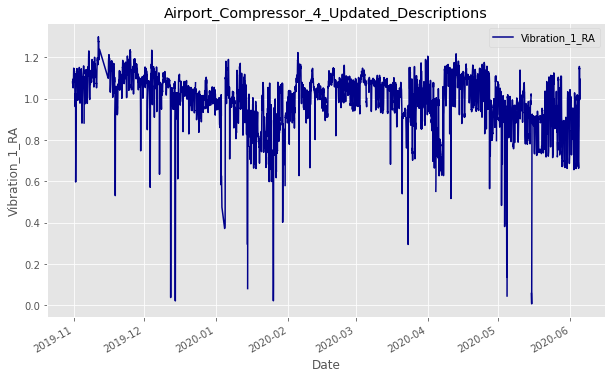

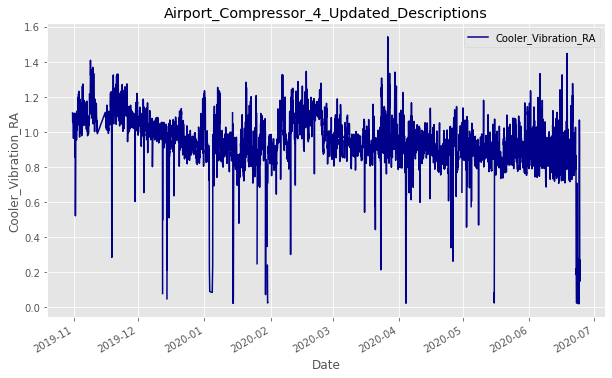

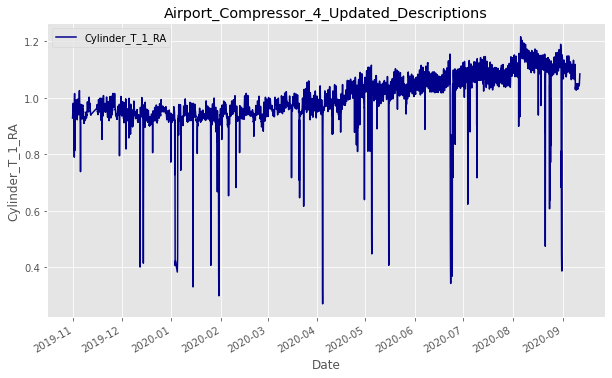

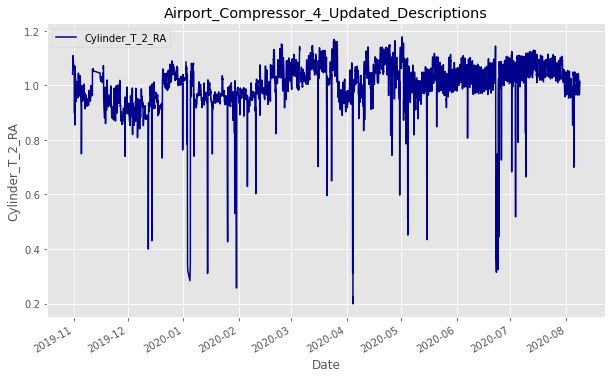

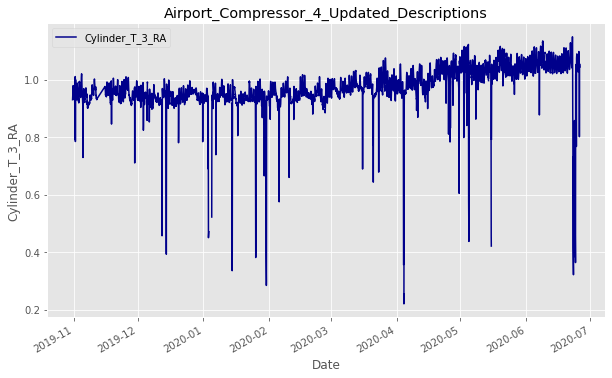

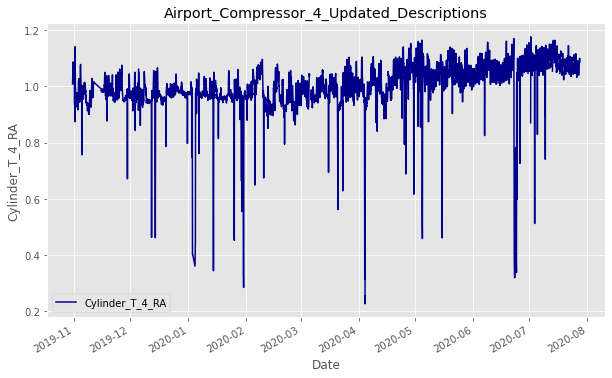

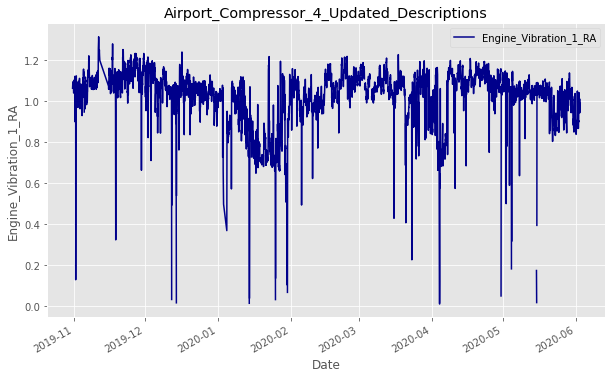

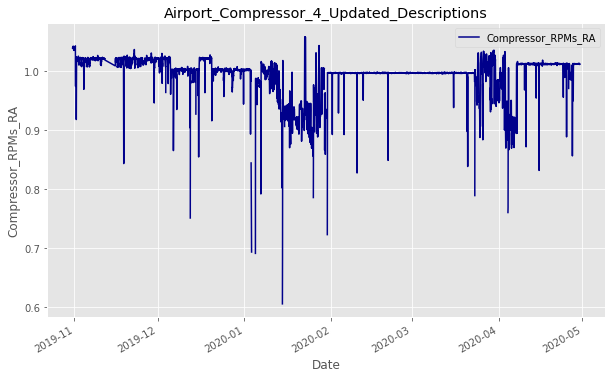

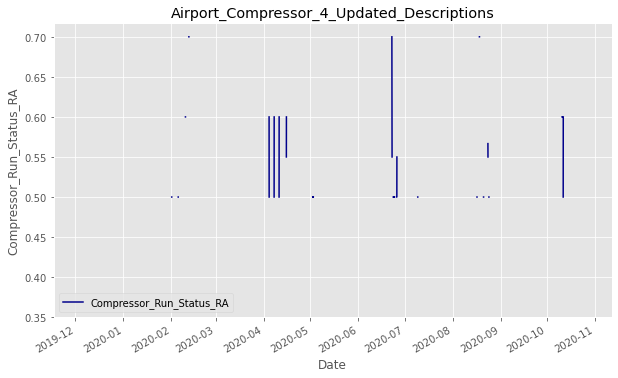

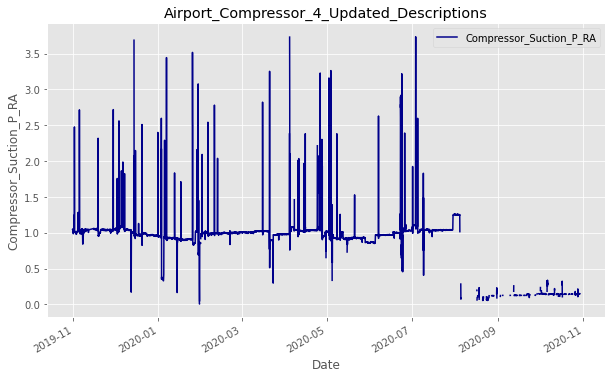

In [53]:
# Plot data grouped by hour
n=16
while n < df_hour.shape[1]:
    df_hour.plot(kind='line', x= 'DateTime', y=df_hour_cols[n], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df_hour_cols[n])
    plt.show()
    n=n+1

In [54]:
# Create new dataframe grouped by day
df_day = df_group.copy(deep=True)
df_day['DateTime'] = df_day['DateTime'].dt.round('D')
# Group by datetime
df_day = df_day.groupby(['DateTime'], as_index=False).mean()
display(df_day)

DateTime  Stage_P_1  Stage_P_2  Stage_P_3  Comp_Oil_P  Comp_Oil_T  \
0   2019-10-31   1.004246   1.045573   1.028565    0.939403    0.994926   
1   2019-11-01   0.971322   1.028646   0.952831    0.928231    0.992397   
2   2019-11-02   0.992027   0.996868   0.963845    0.906212    0.989562   
3   2019-11-03   0.955997   0.996063   0.982114    0.919083    1.013926   
4   2019-11-04   0.960134   1.002470   0.972598    0.928250    0.998505   
..         ...        ...        ...        ...         ...         ...   
358 2020-10-26   1.191044        NaN        NaN         NaN    0.952843   
359 2020-10-27   1.194535        NaN        NaN         NaN    0.959841   
360 2020-10-28   1.126523        NaN        NaN         NaN    0.952905   
361 2020-10-29   1.221971        NaN        NaN         NaN    0.979700   
362 2020-10-30   1.248338        NaN        NaN         NaN    1.025758   

     Vibration_1  Cooler_Vibration  Cylinder_T_1  Cylinder_T_2  ...  \
0       1.077474          1.075921      0.932958      1.047583  ...   
1       1.093850          1.047821      0.940387      1.067096  ...   
2       1.059698          1.021921      0.954808      0.998559  ...   
3       1.080211          1.120803      0.955711      0.991636  ...   
4       1.060762          1.081965      0.965386      1.007723  ...   
..           ...               ...           ...           ...  ...   
358          NaN               NaN           NaN           NaN  ...   
359          NaN               NaN           NaN           NaN  ...   
360          NaN               NaN           NaN           NaN  ...   
361          NaN               NaN           NaN           NaN  ...   
362          NaN               NaN           NaN           NaN  ...   

     Vibration_1_RA  Cooler_Vibration_RA  Cylinder_T_1_RA  Cylinder_T_2_RA  \
0          1.077435             1.071202         0.933539         1.048209   
1          1.101835             1.050797         0.941158         1.067636   
2          1.059906             1.020912         0.953685         0.997699   
3          1.084283             1.123820         0.955741         0.990926   
4          1.058106             1.079540         0.964970         1.008519   
..              ...                  ...              ...              ...   
358             NaN                  NaN              NaN              NaN   
359             NaN                  NaN              NaN              NaN   
360             NaN                  NaN              NaN              NaN   
361             NaN                  NaN              NaN              NaN   
362             NaN                  NaN              NaN              NaN   

     Cylinder_T_3_RA  Cylinder_T_4_RA  Engine_Vibration_1_RA  \
0           0.937283         1.021693               1.080070   
1           0.939965         1.032954               1.076032   
2           0.947135         0.996951               0.991266   
3           0.952795         0.949725               1.049714   
4           0.963743         0.983823               1.024726   
..               ...              ...                    ...   
358              NaN              NaN                    NaN   
359              NaN              NaN                    NaN   
360              NaN              NaN                    NaN   
361              NaN              NaN                    NaN   
362              NaN              NaN                    NaN   

     Compressor_RPMs_RA  Compressor_Run_Status_RA  Compressor_Suction_P_RA  
0              1.039774                       NaN                 1.048022  
1              1.037716                       NaN                 1.042599  
2              1.017355                       NaN                 1.067633  
3              1.019192                       NaN                 0.999582  
4              1.014896                       NaN                 1.050874  
..                  ...                       ...                      ...  
358    

In [55]:
df_day_cols = df_day.columns
df_day_cols

Index(['DateTime', 'Stage_P_1', 'Stage_P_2', 'Stage_P_3', 'Comp_Oil_P',
       'Comp_Oil_T', 'Vibration_1', 'Cooler_Vibration', 'Cylinder_T_1',
       'Cylinder_T_2', 'Cylinder_T_3', 'Cylinder_T_4', 'Engine_Vibration_1',
       'Compressor_RPMs', 'Compressor_Run_Status', 'Compressor_Suction_P',
       'Stage_P_1_RA', 'Stage_P_2_RA', 'Stage_P_3_RA', 'Comp_Oil_P_RA',
       'Comp_Oil_T_RA', 'Vibration_1_RA', 'Cooler_Vibration_RA',
       'Cylinder_T_1_RA', 'Cylinder_T_2_RA', 'Cylinder_T_3_RA',
       'Cylinder_T_4_RA', 'Engine_Vibration_1_RA', 'Compressor_RPMs_RA',
       'Compressor_Run_Status_RA', 'Compressor_Suction_P_RA'],
      dtype='object')

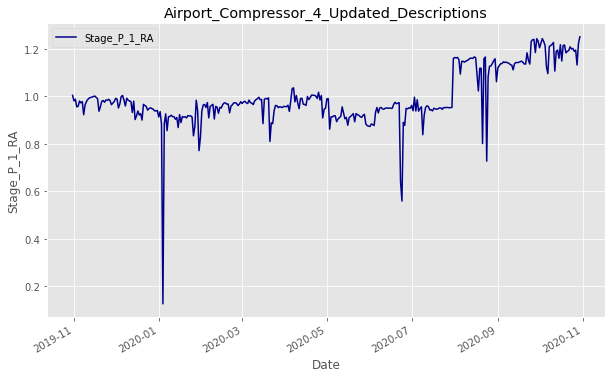

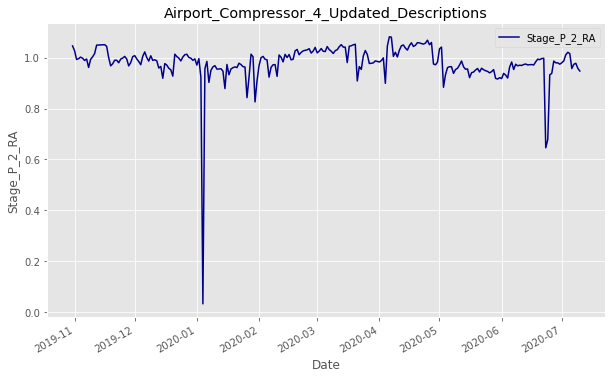

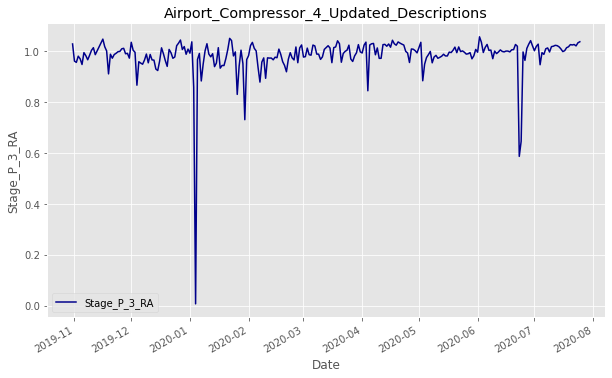

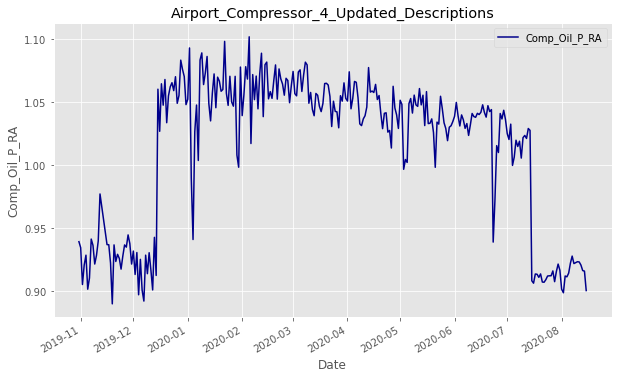

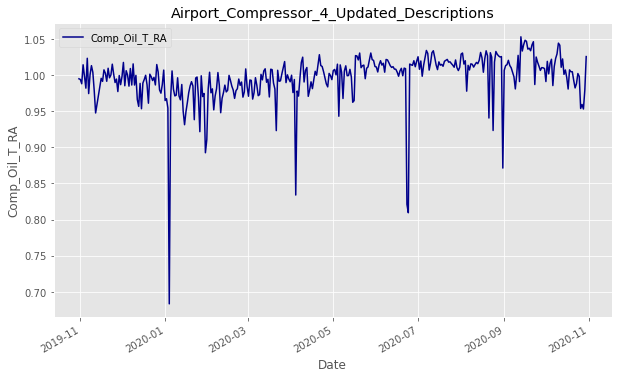

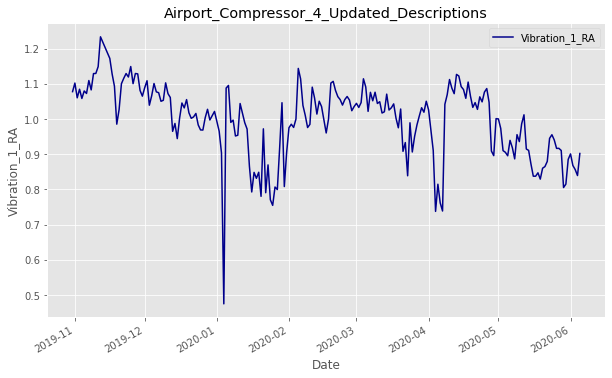

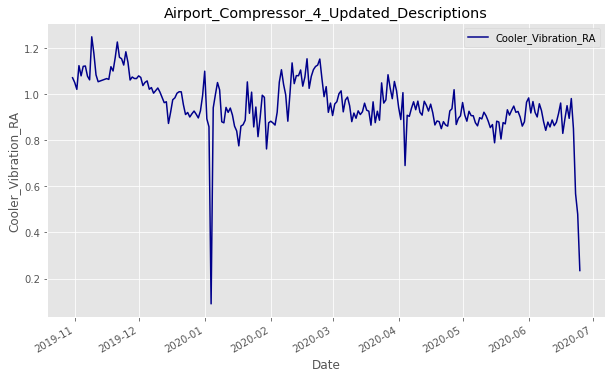

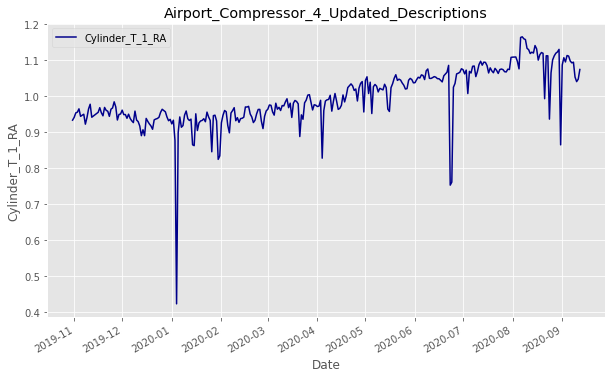

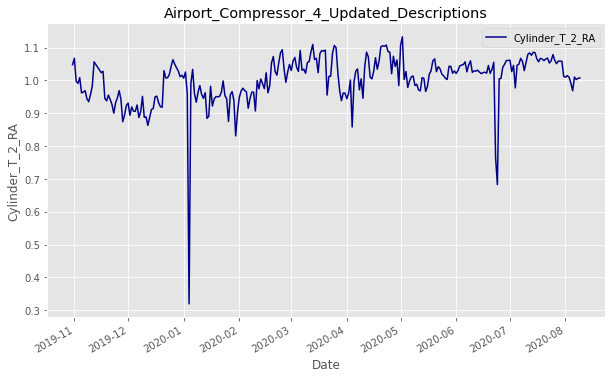

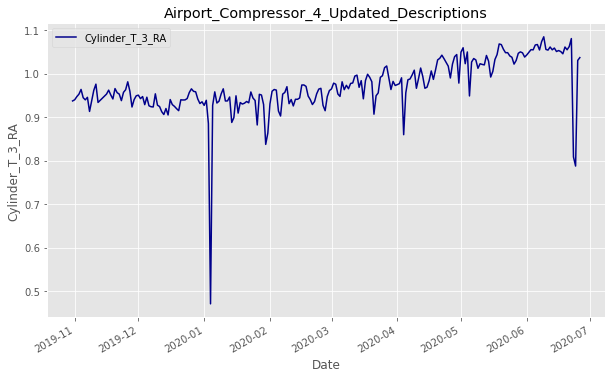

In [ ]:
# Plot data grouped by day
n=16
while n < df_day.shape[1]:
    df_day.plot(kind='line', x= 'DateTime', y=df_day_cols[n], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df_day_cols[n])
    plt.show()
    n=n+1